# Objektově orientované programování

Python je jak již bylo řečeno multiparadigmatický programovací jazyk tj. podporuje více různých stylů programování. Přesto však jen jedno z těchto tzv. paradigmat ovlivňuje Python na všech úrovních programování — objektově orientované paradigma (OOP).

Ve světě tohoto paradigmatu existují tzv. objekty, které mají svou jedinečnou identitu, mění své stavy, vznikají a zanikají. Především však spolu komunikají prostřednictvím volání metod ze svých rozhraní (rozhraní je množina metod, které objekty nabízejí ostatním objektům).

Objekty se navíc seskupují do tříd. Třída obsahuje objekty se stejným rozhraním, tj. objekty, které se při komunikaci chovají podobně (resp. stejně, pokud mají identický vnitřní stav).

S objekty a třídami jsme se již setkali. Čísla jsou v Pythonu velmi jednoduché objekty, které jako své rozhraní nabízejí běžné aritmetické operace. Základními číselnými třídami jsou třídy `int` (representace celých čísel) a `float` (representace racionálních čísel pomocí tzv. pohyblivé řádové čárky). Mezi jednoduché objekty patří i objekty třídy `bool` (jsou jen dva `True` a `False`).

O něco složitější jsou objekty třídy `string` označované jako řetězce. Ty nabízejí ve svém rozhraní větší počet metod. S číselnými objekty však sdílejí dvě podstatné a vzájemně provázané vlastnosti: jsou neměnné a a z vnějšího pohledu existuje vždy jen jeden objekt se stejným stavem (např. z vnějšího pohledu existuje jen jeden objekt čísla 2). I když interně může existovat více kopií stejného objektu, jsou tyto objekty nerozlišitelné.

To již neplatí pro seznamy a mnohé další složitější objekty. Ty svůj stav v průběhu svého života mění, a jejich identita je nezávislá na jejich obsahu.

In [1]:
a = [1]
b = [1]

Proměnné `a` a `b` označují dva různé objekty, které mají stejný stav (u seznamů je stav určem jejich obsahem). Že tomu tak skutečně je poznáme, tím, že jeden objekt změnéme například přidáním prvku:

In [2]:
a.append(2)
print(a) # objekt odkazovaný proměnnou `a` se změnil
print(b) # objekt odkazovaný proměnnou `b` zůstal nezměněný (tj. oba objekty se liší už i obsahem)

[1, 2]
[1]


Mezi další proměnné individuální objekty, které již známe patří objekty planet z modulu `ephem` nebo objekty representující shodu regulárního výrazu s řetězcem (tzv. `match` objekty).

Naši paletu tříd si ještě rozšíříme o třídy ze dvou klíčových modulů. Začneme standardní representací časových a kalendářních údajů v Pythonu.

## Representace časových údajů

I když se to na první pohled nezdá, je representace časových údajů jednou z nejkomplikovanějších problémů tvůrců standardních knihoven. Důvodem je relativně komplikovaný kalendářní systém a ještě komplikovanejší systém časových pásem s jejich stálými posuny a šílenými pravidly pro jejich každoroční posuny (tzv. letní čas). Proti tomu jsou problémy dané vkládáním přestupné sekundy jen detail (může to však značně zkomplikovat program očekávající milisekundovou přesnost).

Ve skutečnosti se ukazuje, že žádná univerzálně použitelná representace času neexistuje. Proto i ve standardní knihovně Pythonu jich existuje několik, a mnohé další přidávají knihovny třetích stran (jako např. *pyephem*).

Základní a všeobecně podporovanou representaci nabízí standardní modul `datetime`. Tato implementace se zaměřuje na podporu representace času v moderní době a  moderním gregoriánském kalendáři (tj. cca po první světové válce) s přesností na úrovni minut či desítek vteřin. Hodí se tak pro běžné historické a průběžné databázové záznamy (datumy narození, časy prodejů apod.) a ekonomickou statistiku. Nepodporuje však správně časová pásma. Nezohledňuje totiž posuny časů v různých místech jako je změna pásmového času (v některých zemích se to děje i několikrát v desetiletí) a především letní čas. 

Jednodušší rozhraní nabízí knihovna pro ty aplikace, které se nemusí starat o časová pásma a využití letního času.

### Representace kalendářních údajů

In [4]:
import datetime

dnes = datetime.date.today()  # dnešek jako kalendářní den
den_d = datetime.date(1989, 11, 17)  # vytvoření kalendářního dne z roku, měsíce a dne

print(dnes)  # vypsání v univerzálním textovém formátu
print(den_d.year) # vypsání atributu (rok)


2018-08-02
1989


Objekty jsou nejčastěji vytvářeny tzv. konstruktory. Konstruktor je funkce, která má stejné jméno jako třída (v našem případě vytváříme třídy `datetime.date` tj. voláme konstruktor `datetime.date`). 

Nové objekty však často vznikají pomocí tzv. třídních metod. Tyto metody se nevolají nad objekty, ale nad třídami. Příkladem třídní metody je metoda `today`, která se volá nad třídou `datetime.date` (třída je ve volání uvedena vlevo od tečky, za níž následuje jméno metody). Bohužel vše je trochu matoucí, neboť Python používá tečku k několika různým účelům:

1) oddělení **jména modulu** od jména funkce nebo proměnné, pokud přistupujeme k funkci/proměnné z importovaného modulu

In [7]:
datetime.date(2000,1,1) # volání funkce (konstruktoru) z modulu `datetime`

datetime.date(2000, 1, 1)

In [8]:
import math

math.pi # proměnná umístěná v modulu `math`

3.141592653589793

2A) oddělení **objektu (adresáta)** a jména metody  (metoda je volána nad objektem)

In [11]:
"test".replace("t", "r") # metoda je volána nad objektem "test"

'resr'

In [12]:
x = [1]
x.clear() # metoda je volána nad objektem označeným proměnnou `x`

2B) oddělení **objektu** a jeho atributu (vlastnosti)

Atribut si lze představit viditelnou vlastnost objektu. Vlastnost je buď součástí vnitřního stavu nebo ji lze z vnitřního stavu jednoznačně odvodit. Na rozdíl od volání metody nenásledují za atributem závorky se seznamem parametrů.

In [28]:
import re

match = re.fullmatch("[A-z][a-z]*", "Gondor") # test shody řetězce s regulárním výrazem
match.string  # atributu objektu representujícího výsledek testu (hodnotou je testovaný řetězec) 

'Gondor'

3A) oddělení **jména třídy**  a jména metody při volání třídních metod

In [16]:
int.bit_length(42) # volání metody `bit_length` nad třídou `int`

6

Poznámka: Metoda `bit_length` vrací počet bitů nutných pro representaci čísla, které je předáno jako parametr.

In [18]:
float.is_integer(2.0)

True

Metoda `is_integer` je volána na třídu `float`. Vrací `True`, pokud je parametr metody celé číslo (o když representované jako `float`, pro čísla třídy `int` je tento test bezpředmětný).

3B) oddělení **jména třídy** a jejího atributu (atribut patří třídě jako takové nikoliv konkrétním objektům)

In [36]:
from datetime import date

print(date.max) # maximální representovatelné datum

9999-12-31


Všechny druhy tečkové notace lze přirozeně kombinovat v jediném zápisu. Následující zápis obsahuje tečku ve všech jejích hlavních rolích.

In [19]:
datetime.date.today().year

2018

Identifikátor `datetime` označuje jméno modulu. Ten obsahuje třídu `date`, na níž je možno zavolat třídní metodu `today`. Tato metoda vrací nový objekt této třídy (representující aktuálné den). Z tohoto objektu následně získáme atribut `year` (rok příslušného data). Na jednotlivé části zápisu se můžete podívat na následujícím obrázku:

![Komplexnější tečková notace](dotnotace.png)

Pokud Vám předchozí výraz připadá složitý, lze jej samoozřejmě rozepsat do několika jednodušších:

In [41]:
from datetime import date # jméno třídy není od této chvíle nutné kvalifikovat modulem

dnes = date.today()  # volání třídní metody, výsledkem je objekt třídy `datetime.date
letos = dnes.year   # a získáme jeho atribut
print(letos)

2018


> **Úkol**: Vytvořte objekt třídy `datetime.date` representující silvestr aktuálního roku. Program by měl využívat metodu `today`, aby fungoval v libovolném roce.

In [40]:
silvestr = date(date.today().year, 12, 31) # předpokládá `from datetime import date`
print(silvestr)

2018-12-31


Objekty třídy `datatime.date` nenabaízejí příliš mnoho metod. Mezi ty nejužitečnější patří: 

In [45]:
dnes = date.today()

print(dnes.weekday()) # vrací den v týdnu jako číslo (0 = pondělí, 1=úterý atd.)

tyden = ["pondělí", "úterý", "středa", "čtvrtek", "pátek", "sobota", "neděle"] # seznam řetězců

print(f"Dnes je {tyden[dnes.weekday()]}")

4
Dnes je pátek


In [47]:
dnes.strftime("%d.%m.%Y")  # převede datumový objekt na řetězec podle formátu

'03.08.2018'

Formát používaný v metodě `strftime` vychází z unixového příkazu `date`. Detailní popis by byl únavný, proto uvádím jen několik praktických příkladů.

In [56]:
print(dnes.strftime("%-d.%-m.%y")) # bez počátečních nul a bez století (všimněte si podtržítek)
print(dnes.strftime("%-d.%B %Y, %A")) # dlouhý tvar v implicitní lokalitě (nastavení jazyka) = en_US

3.8.18
3.August 2018, Friday


Formátovací specifikace příkazu `strftime` lze využít i v běžném formátovaném řetězci.

In [63]:
f"Dnes je {date.today():%-d.%-m.}"

'Dnes je 3.8.'

Dva objekty typu `datetime.date` lze odečítat.

In [71]:
vznikRepubliky = date(1918,10,28)
dnes = date.today()

rozdil = dnes - vznikRepubliky
print(rozdil)

36439 days, 0:00:00


Výsledkem je objekt třídy `datetime.timedelta`, která representuje časový interval. Ten je primárně representován v dnech a vteřinách a jejich zlomcích, neboť neexistují žádné vyšší  jednotky fixní délky (kromě týdnů, ale ty jsou dost nepraktické) a ostatní hodiny a minuty lze dopočítat.

Objekty třídy `datetime.timedelta` lze vytvářet i přímo pomocí volání konstruktoru. V konstruktoru lze kombinovat různé standardní intervaly (týdny, dny, hodiny, minuty, sekundy) pomocí pojmenovaných parametrů (jejichž hodnotami nemusí být jen celá čísla)

In [96]:
from datetime import timedelta

interval = timedelta(weeks=3, days=5, hours=5.5, seconds=2.3)
print(interval)

26 days, 5:30:02.300000


Lze je pak přičítat k objektům `datetime.date`, čímž lze realizovat zadání typu "za čtrnáct dnů".

In [97]:
dnes + timedelta(days=14)

datetime.date(2018, 8, 17)

> **Úkol**: Zjistěte v jakých dnech jste slavili či budete slavit *tisiciny*, tj. dny kdy žijete $k\times 1000$ dnů (kde $k$ je přirozené číslo).

In [101]:
datumNarozeni = date(1971,7,20) # nahraťte svým datem narození
for i in range(20):
    print(datumNarozeni + timedelta(days=i*1_000))

1971-07-20
1974-04-15
1977-01-09
1979-10-06
1982-07-02
1985-03-28
1987-12-23
1990-09-18
1993-06-14
1996-03-10
1998-12-05
2001-08-31
2004-05-27
2007-02-21
2009-11-17
2012-08-13
2015-05-10
2018-02-03
2020-10-30
2023-07-27


Časové intervaly lze i dělit (výsledkem je číslo), což se hodí pokud chcete interval vyjádřit jako číslo v předem známých jednotkách.

In [104]:
vznikRepubliky = date(1918, 10, 28)
vyroci = date(2018,10,28)

pocetLet = (vyroci - vznikRepubliky) / timedelta(days=365.25)
print(pocetLet)  # máme štěstí, že 100 je dělitelné 4 (proč?)

100.0


> **Úkol**: I když je příčítání objektu `datetime.timedelta` užitečné, neřeší všechny požadavky praxe. Zvlášť zapeklité je přičítání měsíců (výsledkem je datum se stejným číslem dne, pokud je to možné, jinak poslední den v měsíci).

> Příklad: 30.ledna + 1 měsíc je 28. nebo 29. února (podle přestupného roku).

> Vytvořte funkci, která přijímá objekt `date` a počet měsíců, které mají být přičteny. Funkce vrací datum získané přičtením daného počtu měsíců.

> Rada: připravte si seznam počtu dnů v jednotlivých měsících. Doporučuji pracovat s měsící číslovanými od nuly.

In [116]:
def addMonths(datum, months):
    """
        datum: původní datum
        months: počet měsíců, které mají být přičteny 
    """
    # získáme jednotlivé části data
    monthDays = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    d = datum.day
    m = datum.month - 1 # měsíce jsou počítány od nuly
    y = datum.year
    m = (m + months) % 12 # přičteme měsíce (a upravíme do rozsahu 0-11) 
    y = y + (m + months) // 12 # k roku musíme přičíst bloky 12 měsíců
    if y % 4 == 0:  # je-li rok přestupný (zjednodušeno)
        monthDays[1] = 29  # pak upravíme délku měsíce února (index=1)
    d = min(d, monthDays[m])  # upravíme dny na konci měsíce 
    # (denní číslo nesmí být větší než počet dní v měsíci)
    return datetime.date(y, m+1, d)

# testy
print( addMonths( date(2018,1,31), 1) )
print( addMonths( date(2018,1,30), 25) ) # přestupný rok
print( addMonths( date(2018, 3, 31), -25 )) # funguje i odečítání!

2018-02-28
2020-02-29
2016-02-29


Kód funkce má tři části.
Nejdříve se získají jednotlivá čísla dnů, měsíců a roků. Číslo měsíce je upraveno tak, aby počítání měsíců začínalo nulou (leden) a končilo 11 (prosinec). Jedině tak lze využít operaci zbytek po dělení v další části.

V druhé (nejsložitější části) jsou spočítána nová čísla dnů, měsíců a roků. K číslu měsíce se přičte požadovaný počet měsíců. Výsledkem však může být měsíc mimo rozsah (12 a výše). Namísto měsíce 12, chceme měsíc 0, namísto měsíce 13, měsíc 2 (čísla měsíce se v následujícím roce opakují). Nové číslo měsíce proto získáme jako zbytek po dělení 12.
Upravit musíme i rok. Za každých 12 měsíců v součtu (aktuální měsíc + počet přičtených) musíme zvýšit počet roků o jedna (zde využijeme celočíselné dělení). Poté upravíme maximální počet dnů v únoru přestupných roků (test, zda je rok přestupný je zjednodušen, tj. funkce bude fungovat jen do roku 2099).
Nakonec upravíme denní číslo, pokud leží mimo rozsah měsíce.

Nakonec vytvoříme nový objekt `date` (nesmíme zapomenout  na 

### Representace denního času

denní čas (0:00 až 24:00) representují instance třídy `datetime.time`. Použití těchto objektů se příliš neliší od objektů `date` (rozdíl je pouze v atributech).

In [123]:
from datetime import time
poledne = time(12, 0)

print(poledne)
print(poledne.hour)
print(poledne.minute)
print(poledne.second)

12:00:00
12
0
0


Pro formátování se i zde používá metoda `strftime` samozřejmě s jinými popisovači.

In [125]:
poledne.strftime("%H:%M:%S")

'12:00:00'

Další operace (jako je odečítání či přičítaní intervalu) však na tento objekt nelze aplikovat (což je popravdě trochu překvapivé).

### Representace časových okamžiků

Poslední důležitou třídou modulu `datetime` je třída representující časové okamžiky (angl. *timestamps*), které nastávají v určitý denní čas v rámci jistého kalendářného dne (data). Tato třída v sobě ve skutečnosti spojuje instance třídy `datatime.date` a `datatime.time`.

Jméno třídy je poněkud matoucí, neboť je stejné jako jméno modulu — `datetime`. Pokud tedy hodláte používat kvalifikované jméno musíte uvádět jméno `datetime.datetime`. 

Rozhraní třídy je v zásadě obdobou třídy `datetime.date`, pouze přibývají atributy (a ve `strftime` popisovače) denního času. Více údajů můžete předat i konstruktoru. 

In [133]:
pristaniNaMesici = datetime.datetime(1969, 7, 20, 20, 17, 40)
print(pristaniNaMesici)

print(pristaniNaMesici.date())  # datumová část (je to metoda ne atribut)
print(pristaniNaMesici.time())  # denní čas (nápodobně)

print(pristaniNaMesici.year)  # k dílčím atributům lze přistupovat i přímo
print(pristaniNaMesici.hour)

1969-07-20 20:17:40
1969-07-20
20:17:40
1969
20


Formátování zajišťuje i zde metoda `strftime`, která podporuje popisovače pro datumové a časové údaje. Vše pochopitelně funguje i ve formátovaném řetězci:

In [139]:
f"Přistávací modul Apolla poprvé přistál na Měsíci dne {pristaniNaMesici:%d.%m.%Y ve %H:%M}"

'Přistávací modul Apolla poprvé přistál na Měsíci dne 20.07.1969 ve 20:17'

Aktuální časový okamžik lze získat třídní metodou `now`. Časové okamžiky lze samozřejmě i odečítat.

In [146]:
rozdil = datetime.datetime.now() - pristaniNaMesici 
# výsledek není přiliš přesný oba údaje jsou v různých časových pásmech (now v SELČ, přistáni v UTC)
print(rozdil)
print(rozdil/timedelta(hours=1)) # vyjádření v hodinách a jejích zlomcích

17911 days, 23:55:56.946579
429887.9324851608


### Převod textové representace na objekt `datetime`

Opakem metody `strftime` je u třídy `datetime.datetime` třídní metoda `strptime`. Tato metoda interpretuje řetězec jako textovou representaci data (spolu s případným denním čase) a pokusí se jej podle předaného formátui převést na ob

Je to přirozeně třídní metoda, neboť vytváří nový objekt. Pokud by byla běžnou metodou objektu, pak by tento objekt musel existovat již před volání, čímž bychom se dostali k paradoxu typu "vejce nebo slepice".

In [68]:
vstup = input("Zadej datum: ")
datum = datetime.datetime.strptime(vstup, "%d.%m.%Y")
print(datum)

Zadej datum: 2.3.2002
2002-03-02 00:00:00


#### Časová pásma (velmi jemný úvod)

Všechny výše uvedené příklady využívali tzv. naivní representaci časových údajů bez zohlednění časových pásem. I když se může stát, že časová pásma musí využívat jen programy podporující vstup a výstup v různých časových pásmech, není toumu tak.

In [86]:
zacatek = datetime.datetime(2018, 10, 28) # půlnoc 28.10.2018
konec = datetime.datetime(2018, 10, 29)

interval = konec - zacatek
print(interval) # to je ještě akceptovatelný výsledek (rozdíl je skutečně 1 den)
sekundy = interval.total_seconds() 
print(sekundy)  # to je určitě špatně

1 day, 0:00:00
86400.0


Je zajímavé, že i zdánlivě správný výsledek může být ve skutečnosti špatně :). Problém je v tom, že ne každý den má 24 hodin. Den 28.10. 2018 má 25 hodin, neboť v něm dochází k přechodu z letního na zimní čas. Mezi půlnocí obou dnů tak uběhne `25*3600` = 90 000 sekund.

Řešení není zcela jednoduché, neboť objekty, třídy `datetime` letní čas nezohledňují (o když podporují časová pásma, ale jen s fixní rozdílem od světového času). Pokud jsou časy vztaženy k časovému pásmu, jež je nastaveno v operačním systému (v Linuxu je pro ČR používáno pásmo `Europe/Prague`, viz https://en.wikipedia.org/wiki/Tz_database), pak je řešením převod do tzv. POSIXovské epochy (= počet sekund od 1.1.1970), které časová pásma zohledňuje. Metoda `datetime.datetime.timestamp` vrací tento údaj jako `float` číslo.

In [88]:
konec.timestamp() - zacatek.timestamp()

90000.0

Pokud potřebujete úplnou podporu všech časových pásem, lze využít standardní, ale nízkoúrovňový modul `time`, nebo modul `pendulum`.

In [149]:
!pip install pendulum

tensorflow 1.3.1 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
tensorflow 1.3.1 has requirement protobuf>=3.3.0, but you'll have protobuf 3.2.0 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [166]:
import pendulum

now = pendulum.now()
print(now) # zobrazí se i údajem o časovém pásmu
pristaniNaMesici = pendulum.datetime(1969,7,20,20,17,40, tz='Etc/UTC') # časové pásmo UTC
print(pristaniNaMesici)
interval = now-pristaniNaMesici # výsledkem je třída pendulum.Period
print(interval.as_timedelta()) # pro sandnější porovnání jej převedeme na objekt `timedelta`

# pro porovnání
interval2 = (datetime.datetime.now() - datetime.datetime(1969,7,20,20,17,40))
print(interval2)
print((interval - interval2).total_seconds())

2018-08-04T20:35:36.327428+02:00
1969-07-20T20:17:40+00:00
17911 days, 22:17:56.327428
17912 days, 0:17:56.328305
-7200.000877



Jak je vidět modul `pendulum` zohlednil tůzná časová pásma (u data přistání je explicitně uvedeno, že jde o světový čas UTC, funkce `now` vrací čas se správným časovým pásmem). Komplexnost časových výpočtů ukazuje skutečnost, že ani `pendulum` nevrátilo správný výsledek, neboť nezohlednilo 27 přestupných sekund vložených od roku 1972 a jen obtížně odvoditelný posun daný tím, že mezi roky 1961 a 1972 se nepravidelně vkládaly skoky 100 ms, aby se čas UTC přizpůsobil rotaci Země (navíc se mírně měnila i délka sekundy). Celkově se však jedná o rozdíl cca 30 sekund.

## Práce se soubory (proudy dat)

Jakýkoliv plnohodnotný program musí pracovat s externími daty (vypsání "Hello, world" či výpis jakéhokoliv jiného fixního textu není programem). Externí data jsou typicky zadávána interaktivně uživatelem (viz nám již známou vestavěnou funkci `input`), čtena z datových souborů nebo jsou získávana z Internetu.

Všechny tyto externí zdroje dat lze sjednotit do abstraktního mechanismu proudu dat (angl. `stream`). Nejebecnější typem proudu jsou bytové proudy, které poskytují konečnou posloupnost bytů (byte = binární representace čísel 0-255 = 8 bitů).

Kromě bytových proudů se používají i proudy znakové. Znakové proudy můžeme chápat jako konečnou posloupnost znaků (písmen, číslic, symbolů, apod.). Interně se každý znak ukládá či přenáší pomocí jednoho či více bytů. které kódují pozici znaků v nějaké znakové sadě (tabulce jednotlivých znaků).

*Poznámka*: V dřívějších dobách se používaly znakové sady s maximálně 255 znaky, tj. pozice ve znakové sadě byla vyjádřitelná právě jedním bytem. Bytové a znakové proudy se tak lišili jen interpretací přenášených bytů (u znakových bylo navíc nutno znát použitou znakovou sadu). Počet 255 znaků však nestačí pro representaci např. činštiny tím spíše textů s více písmy. V současnosti, tak převažuje znaková sada Unicode (aktuálně cca 140 tisíc znaků). Takový počet znaků vyžaduje samozřejmě vícebytové kódování (existuje více kódování znakové sady Unicode)



Nejjednodušší je vytvoření proudů (bytových i znakových) nad soubory v rámci souborového systému (ten je tvořen typicky daty na lokálních discích, i když do něj lze připojovat i vzdálenější datová úložiště).

Vytvoření a otevření těchto proudů zajišťuje vestavěná funkce `open`:

In [171]:
stream = open("python_output.txt", "wt")

Prvním parametrem je jméno souboru. To může být buď relativní (pak se vztahuje k aktuálnímu adresáři, což je standardně adresář, v němž je pythonský skript resp. jupyter notebook), nebo absolutní (tvar se liší mezi Windows a Unixem).

Druhý parametr je režim otevření. V našem případě obsahuje znak "w" určující, že proud slouží k zápisu (*write*) do souboru (tj. my budeme zapisovat) a znak "t" určující, že proud bude textový (a textový tak bude i zapsaný soubor). Pokud soubor existuje pak je před zápisem zkrácen na nulovou délku (tj. náš výstup původní obsah přepíše).

Po otevření můžeme do našeho proudu zapisovat. To zajišťuje metoda se jménem `write`:

In [172]:
stream.write("One Ring to rule them all\n") # zapisuje do textového proudu celý řádek
stream.write("One Ring to find them\n")

22

Metoda `write` vloží znaky postupně do proudu. Všimněte si, že řádky musí 

Metoda `write` vrací počet zapsaných znaků (u nás je to 22 znaků u druhého zápisu). K zápisu však prozatím pravděpodobně ještě nedošlo. Data jsou totiž většinou dočasně umisťována do vyrovnávací paměti. Jistotu budeme mít, až když proud zavřeme.

In [173]:
stream.close()

Každý proud by měl být po použití uzavřen! Nejenže tím zajistíme skutečný zápis na disk, ale uvolníme i prostředky, které pro správu proudu alokoval náš program i operační systém.

Nyní se pokusíme data ze souboru zpětně načíst. Nejdříve soubor znovu otevřeme, tentokrát ale zvolíme jiný režim ("r" jako *read*, a opět "t" pro textový proud).

In [175]:
stream = open("python_output.txt","rt")

Pokud chceme přečíst celý obsah souboru najednou, pak použijeme metodu `read` (bez parametrů).

In [177]:
text = stream.read()

Soubor nezapomeneme zavřít (u důvodů úspory prostředků).

In [179]:
stream.close()

In [180]:
print(text) # pro kontrolu text vypíšeme

One Ring to rule them all
One Ring to find them



I když je čtení celého souboru jednoduché, v praxi se příliš nepoužívá. Hlavní důvodem je skutečnost, že v některých textových souborech je členění klíčové členění na řádky (např. každý řádek obsahuje jednu položku dat). U velkých souborů může navíc načtení celého textu vést k zaplnění (či lépe přeplnění) operační paměti.

Pro čtení jednotlivých řádek slouží metoda `readline`. Ta vrací řádky (zakončené znakem odřádkování). Na konci souboru vrátí prázdný řetězec.

In [181]:
stream = open("python_output.txt","rt")  # soubor musíme znovu otevřít

line = stream.readline()  # (potenciální) první řádek načteme ještě před cyklem
while line != "":         # dokud není konec souboru
    print(line)           # řádek vytiskneme
    line = stream.readline() # načteme další řádek

stream.close()

One Ring to rule them all

One Ring to find them



Všimněte si, že na výstupu jsou prázdné řádky. Důvodem je skutečnost, že každý načtený řádek obsahuje znak odřádkování, tj. při tisku se odřádkuje dvakrát (jedno odřádkování obsahuje tištěný řetězec, druhé odřadkování přidává funkce `print`)

Jak lze vidět z kódu je použití metody `readline` komplikovanejší než by začínající programátor čekal. Je totiž nutné provádět volání metody `readline` na dvou místech. Jednou před cyklem `while`, aby bylo možno otestovat výsledek prvního čtení) a podruhé na konci těla (získání dalšího řádku).

Naštestí Python umožňuje textový proud používat jako iterátor, který postupně vrací jednotlivé řádky (bez znaku odřádkování na konci). Pro procházení tak lze využít cyklus `for`.

In [183]:
stream = open("python_output.txt","rt")  # soubor musíme znovu otevřít

for line in stream: # přes všechny řádky proudu
    print(line, end="")  # print nemusí přidávat vlastní odřádkování

One Ring to rule them all
One Ring to find them


Jak je to jednoduché, když používáte Python :)

Na něco jsem ovšem zapomněl, uzavřít proud/soubor.

In [184]:
stream.close()

I zde Python nabízí zapomnětlivým elegantnější řešení konstrukci **with**. Tato konstrukce zajistí automatické uzavření souboru na konci (odsazeného] bloku příkazů. Konstrukci si ukážeme u programu, který vrací maximální délku řádku (tj. počet znaků v nejdelším řádku).

In [192]:
with open("python_output.txt", "rt") as stream:  # otevře proud a označí jej proměnou `stream`
    maxlength = max([len(line)-1 for line in stream]) # využijeme komprehenzi
# níže je už proud uzavřený
print(maxlength)

25


Konstrukce začíná klíčovým slovem `with` za nímž následuje volání funkce `open`. Vrácený objekt (proud) je opatřen proměnnou `stream` (v tomto místě se nepoužívá přiřazení, namísto toho je proměnná uvedena za klíčovým slovem `as`. Od této chvíli existuje jak proměnná tak proud na nějž odkazuje (a ten jen samozřejmě otevřený).

S proměnnou i s proudem lze pracovat v bloku, jenž následuje za `with`. Poté co skončí (a skončit může různě včetně např. příkazu `return` nebo vyvoláním výjimky) se automaticky proud autoamticky uzavře (tj. zavolá se jeho metoda `close`). 

Je zajímavé, že proměnná i objekt proudu existují i poté, co skončí konstrukce `with`. Proud je však již nepoužitelný (nelze z něj již nic číst).

#### Generátorové výrazy

Využití seznamové komprehenze pro hledání maximálního počtu řádku výrazně zjednodušuje program, není však zcela efektivní.

Zápis `[len(line) for line in stream]` vytváří seznam, tím že postupně čte řádky souboru (metodou `readline`), zjišťuje délku získaných řádků (funkce `len` vrací délku řetězců, jedničku odečítáme, neboť řetězec obsahuje na konci znak odřádkování) a výsledná čísla přidává postupně do seznamu. Až po dokončení seznamu se na něj volá vestavěná funkce `max`, která vrátí největší prvek (= délka nejdelšího řádku).

Vytvoření seznamu je však zbytečné, neboť maximum lze získat i průběžným procházením čísel (bez toho, že bycjom si je všechny ukládali). Již v několika příkladech jsme ukázali, že si stačí pamatovat průběžné maximum a to porovnávat s postupně přicházejícími údaji (je-li větší stane se průběžným maximem).

Tento algoritmus lze ukázet i na příkladě z praktického života. Představme si, že skupina osob nastupuje v přízemí do výtahu, který si pamatuje jen jedno cílové podlaží. Je zřejmé, že nejefektivnější, když všichni oznámí patro kam jedou a na ovládacím panelu se zvolí nejbližší z nich (tj. minimum).

I když bychom měli dům s desítkami pater a do výtahu by nastupovali desítky lidí, lze minimální patro určit i bez notesu, kam bychom si jednotlivá cílová podlaží zapisovali. Stačí si prostě jen pamatovat, to  průběžně nejnižší: 22, 7, 8, 11, 13, 9, 7, 3, 17, 4.

Naše předchozí řešení je tedy zbytečně složité (je to řešení s notesem). Na druhou stranu jsme se vyhnuli cyklu `for` a vnořené podmínce `if`.

I zde však existuje řešení, které je zároveň efektní (= stručné a přehledné) i efektivní (nevyžaduje téměř žádnou paměť navíc) -- **generátorový výraz**.

Z hlediska syntaxe se generátorový výraz liší od seznamové komprehenz pouze uzávorkováním. Na rozdíl od hranatých závorek seznamové komprehenze používá běžné oblé závorky.

In [1]:
(i**2 for i in range(10))

<generator object <genexpr> at 0x7f315019eeb8>

Je však vidět, že na místo seznamu vrací tzv. generátor. To je speciální případ tzv. iterátorů, objektů, které na požádání vracejí posloupnost hodnot. Generátory jsou případem tzv. lenivých iterátorů, tj. další číslo v posloupnosti vracejí až tehdy, kdy už není zbytí. Podobají se tak například objektům rozsahů (*range*).

Generátory se typicky volají na jiné lenivé iterátory (rozsahy, textové proudy) a transformují je na jiné opět lenivé iterátory. Funkce typu  `sum` nebo `max` lze volat na libovolné iterátory vracející čísla tj. i na vhodné generátorové výrazy:

In [3]:
from random import randint

max(randint(0,10**9) for _ in range(10**6)) # maximum z milionu náhodných celých čísle

999999452

Zde je generátorový výraz volán na iterátor přes čísla 0 až 1000000-1. Transformuje jej do iterátoru, který poskytuje milion náhodných čísel (každé leží mezi 0 a miliardou). Funkce `max` vybírá postupně tato čísla z lenivého iterátoru a počítá průběžné maximum. Díky použití generátorového výrazu se nevytváří zbytečné pole o miliónu položek o velikosti desítek megabajtů.

Několik poznámek k syntaxi:  Kulaté závorky kolem generátorového výrazu lze vynechat, pokud je výraz jediným parametrem funkce (jako zde). Uvnitř závorek omezujících parametr ve volání funkce tak není nutné psát další dvojici závorek. Všimněte si i použití podtržítka na místě řídící proměnné (proměnné, která postupně odkazuje prvky primárního iterátoru). Podtržítko je běžný název proměnné (stejně jako `i` nebo `j`), který se v Pythonu využívá v situacích, kdy je formálně vyžadována proměnná, která se však ve skutečnosti nikdy nepoužije (všimněte si, že zde generující výraz `randint(0,10**9)` na proměnné `_` nijak nezávisí). Je to však jen úzus (tj. můžete použít jakékoliv jiné jméno proměnné).

> **Úkol**: Vytvořte funkci, která vrátí počet řádků v souboru (jméno souboru je parametrem funkce). Využijte konstrukci `with`.

> Rada: Počet řádků (stejně jako počet položek jakéhokoliv iterátoru) nejsnadněji získáte použitím generátorového výrazu poskytujícího  a funkce `sum` (sčítáte jedničky).

In [4]:
def linedcount(filename):
    with open(filename, "rt") as stream:  #  soubor se uzavře automaticky v rámci návratu z funkce
        return sum(1 for line in stream) 
        # vrátíme součet iterátoru poskytujícího tolik jedniček kolik je řádků v souboru

# linedcount("python_output.txt")
linedcount("/etc/passwd") # něco pro uživatele Linuxu (ostatní mohou zkusit jiný textový soubor)

47

**Řešený příklad**: 

Vygenerujte textový CSV soubor obsahující údaje o vzdálenosti mezi středem Země a středem Měsíce pro půlnoc každého dne roku 2018.

CSV (zkratka za *Comma-Separated Values*) je jednoduchý, ale stále široce, používaný datový formát, v  němž jednotlivé řádky representují datové záznamy, v nichž jsou jednotlivé záznamy oddělené čárkou resp. jiným vhodným oddělovačem. Pokud je oddělovač obsažen i v jednotlivých hodnotách (typicky v textové hodnotě, ale viz například desetinná čárka), pak musí být hodnota uvedena v uvozovkách.

V našem příkladě by měl každý CSV řádek obsahovat dvě hodnoty, datum v rozumné textové podobě (např. `1.1.2018`), a vzdálenost Země – Měsíc v kilometrech.

V případě uvádění datumu si však nemůžeme být jisti, že bude případným uživatelem špatně interpretováno (chybné časové pásmo, formát apod.) Navíc zpracování datumů v textové podobě nemusí být triviální. Z tohoto důvodu je vhodné čas uvést i v nějaké standardizované a snadno zpracovatelné podobě. Vhodný je například tzv. unixový (POSIX) čas, v němž je čas representován jako počet sekund od 1.1.1970 UTC.

Jádrem řešení je cyklus přes 365 časových okamžiků (od 1.1.2018) s krokem jednoho dne.
Pro representaci času použijeme třídu `datetime.datetime`, abychom si ji procvičili (lze samozřejmě použít i třídu `ephem.Date`).

In [20]:
import datetime
import ephem
 
startDay = datetime.datetime(2018, 1, 1) # počáteční datum
moon = ephem.Moon()                      # objekt Měsíce

with open("moonDistances.csv", "wt") as stream:
    for dayNumber in range(365):   # dayNumber nabývá hodnot 0,1, až 364
        day = startDay + datetime.timedelta(days=dayNumber) # zjistíme 
        moon.compute(day) # funguje i s datetime (interně se převede na `ephem.Date`)
        distance = moon.earth_distance * ephem.meters_per_au / 1000.0 # převod z AU na kilometry
        stream.write(f"{day:%d.%m.%Y}, {day.timestamp()}, {distance:.1f}\n") 
        # pozor nutný je znak odřádkování na konci řetězce

Kód po vyhodnocení nic nevypíše, neboť jediným viditelným efektem programu je vytvoření a naplnění textového souboru `moonDistances.csv`. Vypišme několik prvních řádků tohoto souboru (níže uvedený externí příkaz funguje jen v Linuxu resp. Unixu).

In [14]:
!head moonDistances.csv

01.01.2018, 1514761200.0, 357399.5
02.01.2018, 1514847600.0, 356573.3
03.01.2018, 1514934000.0, 357770.0
04.01.2018, 1515020400.0, 360863.6
05.01.2018, 1515106800.0, 365514.7
06.01.2018, 1515193200.0, 371240.9
07.01.2018, 1515279600.0, 377506.3
08.01.2018, 1515366000.0, 383801.7
09.01.2018, 1515452400.0, 389699.8
10.01.2018, 1515538800.0, 394884.7


A pro jitotu se podíváme i na konec souboru:

In [16]:
!tail moonDistances.csv

22.12.2018, 1545433200.0, 365824.9
23.12.2018, 1545519600.0, 362712.0
24.12.2018, 1545606000.0, 361199.5
25.12.2018, 1545692400.0, 361342.2
26.12.2018, 1545778800.0, 363007.9
27.12.2018, 1545865200.0, 365917.8
28.12.2018, 1545951600.0, 369711.0
29.12.2018, 1546038000.0, 374014.6
30.12.2018, 1546124400.0, 378498.7
31.12.2018, 1546210800.0, 382910.1


Program se jeví jako funkční (pro skutečné ověření vy však bylo záhodno výstup zkontrolovat vzhledem k nějaké autoritativní efemeridě).

Jedním z hlavních rysů Pythonu je velká nabídka modulů standardních modulů. Mezi nimi lze nalézt modul `csv`, který nabízí vysokoúrovňové rozhraní pro přístup k CSV souborům. Zkusíme tento model použít:

In [28]:
import datetime
import ephem
from csv import writer
    
startDay = datetime.datetime(2018, 1, 1) # počáteční datum
moon = ephem.Moon()                      # objekt Měsíce

with open("moonDistances2.csv", "wt") as stream:
    csvwriter = writer(stream) # vytvoříme specializovaný writer
    for dayNumber in range(365):   # dayNumber nabývá hodnot 0,1, až 364
        day = startDay + datetime.timedelta(days=dayNumber) # zjistíme 
        moon.compute(day) # funguje i s datetime (interně se převede na `ephem.Date`)
        distance = moon.earth_distance * ephem.meters_per_au / 1000.0 # převod z AU na kilometry
        csvwriter.writerow([day.strftime("%d.%m.%Y"), day.timestamp(), round(distance, 1)])
        # pozor nutný je znak odřádkování na konci řetězce

In [29]:
!head moonDistances2.csv

Použití specializovaného CSV writeru program program zdánlivě příliš nezjednodušil. Přibyl jeden řádek (před cyklem), v němž je vytvořen objekt tzv. writeru. Writer je objekt, který využívá (textový) proud pro výpis složitějších objektů (v tomto případě řádku hodnot). Proud, do kterého writer vypisuje je parametrem konstruktoru.

Následný výpis (v těle) používá metodu `writerow`, který očekává seznam hodnot (před předáním se musí upravit či naformátovat).

Výhody se však ukáží v případě, kdy chceme CSV nakonfigurovat, tak aby byl použit jiný oddělovací znak včetně případného vložení uvozovek kolem hodnot obsahujících znak oddělovače. Jako příklad uveďme CSV, jehož číselné hodnoty využívají desetinnou čárku namísto tečky (nejjednodušším způsobem záměny destinné tečky za čárku je převod čísla na řetězec následovaný záměnou znaku čárky za znak tečky).

In [47]:
from sys import stdout  # sys.stdout textový proud směrovaný na standardní výstup
from math import pi

w = writer(stdout)

w.writerow(["altitude", str(pi).replace(".",",") , 5, 'text s "uvozovkami"'])

altitude,"3,141592653589793",5,"text s ""uvozovkami"""


Writer v tomto případě uvede číslo v uvozovkách (aby bylo zřejmé, že čárka není oddělovačem, ale je součást hodnoty)  Ostatní hodnoty (neobsahující čárku) jsou uvedeny bez uvozovek. Navíc, pokud nějaká hodnota obsahuje uvozovky, pak je zdvojí (aby se odlišily od těch přidaných).

Writer lze přirozeně i konfigurovat, například změnit oddělovač:

In [48]:
from sys import stdout  # sys.stdout textový proud směrovaný na standardní výstup
from math import pi

w = writer(stdout, delimiter=";")

w.writerow(["altitude", str(pi).replace(".",",") , 5, 'text s "uvozovkami"'])

altitude;3,141592653589793;5;"text s ""uvozovkami"""


### Získávaní textových dat z Internetu 

Lokální soubory tvoří dnes jen menší část dostupných dat. Většina aplikací využívá primárně dat z Internetu. Ty jsou ve valné míře dostupné prostřednictvím HTTP (resp. HTTPS) protokolu.

Podporu HTTP resp. HTTPS protokolu nabízí samozřejmě i standardní knihovna Pythonu (modul `urllib.request`). V praxi se však používa více externí balík `requests` (neboli *HTTP for Humans*).

In [49]:
!pip install requests

tensorflow 1.3.1 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
tensorflow 1.3.1 has requirement protobuf>=3.3.0, but you'll have protobuf 3.2.0 which is incompatible.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Zkusme nejdříve jednoduchý příklad, načtení textového souboru.

In [57]:
import requests

response = requests.get("https://www.gutenberg.org/ebooks/28885.txt.utf-8")
print(response.text[:100])

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use


Jak je vidět získání textového obsahu vyžaduje jen dva snadné kroky. Za prvé volání funkce `requests.get`, jejímž parametrem je URL příslušného souboru (zde je to textový obsah Alenčiných dobrodružství nabízený projektem *Guttenberg*). To může chvíli trvat, ale po skončení je vrácen objekt representující odpověď webového serveru (tzv. *response*). 

Tento objekt nabízí velké množství atributů, z nichž nás v tuto chvíli zajímá atribut `text`. Ten vrací textový obsah jako jeden velký řetězec (pro úsporu místa vypisuji jen prvních 100 znaků).

**Řešený příklad**

Stažení tak velkého textového obsahu využijeme pro rozšíření vašich znalostí o regulárních výrazech. Naším úkolem bude zjistit kolikrát se v anglickém originálu Alenčiných dobrodružství vyskytuje Alenčino jméno.

Přímočaré řešení je jednoduché. Rozložíme řetězec na jednotliví slova a spočítáme, kolik z nich je rovno řetězci `Alice` (použijeme generátorový výraz a nám již známé počítání jedniček).

In [3]:
import requests

response = requests.get("https://www.gutenberg.org/ebooks/28885.txt.utf-8")
text = response.text

sum(1 for word in text.split(" ") if word == "Alice")

160

Výstup vypadá rozumně, je však chybný. Problém je v tom, že jméno Alice může být obklopeno i jinými znaky než jen mezerami (například odřádkováním, čárkou, tečkou, apod.) Řešení je to také dosti neefektivní neboť metoda `str.split` vrací seznam řetězců (o mnoha tisící položkách) nikoliv lenivý iterátor (použití generátorového výrazu to neřeší, ten již pracuje nad seznamem řetězců, a zabrání pouze vzniku seznamu cca 160 jedniček). 

Řešení nabízí modul `re` (regulární výrazy), který nabízí metodu `finditer`, která vrací lenivý iterátor přes výskyty podřetězců, které odpovídají regulárnímu výrazu.

In [4]:
from re import finditer
sum(1 for _ in finditer("Alice", text))

402

Stručné, přehledné a správné. Jediné, co je nutno v některých situacích zohlednit, je skutečnost, že funkce nedokáže najít překrývající se výskyty vzorů.

In [7]:
list(finditer("aba", "ababa"))

[<_sre.SRE_Match object; span=(0, 3), match='aba'>]

Jak je vidět funkce `finditer` našla jeden výskyt (od indexu 0 do indxu 2 včetně), i když se podřetězec "aba" nachází i od indexu 2.  

[konec řešeného  příkladu]

Stažení a zpracování běžného textového souboru je sice užitečné, avšak v praxi se většina textového a datového obsahu na Internetu je uložena ve formě strukturovaných textových dat (a samozřejmě i multimediálních souborů).

Mezi nejdůležitější univerzální textové formáty patří HTML, XML a JSON.  Nejjednodušší z nich je JSON, který je hojně využíván v rámci tzv. webových služeb. Webová služba nabízí strukturovaná data (typicky právě ve formátu JSON) jako odpověď na HTTP požadavek GET s určitým URL. Typicky se tak poskytují informace o počasí, dopravní situaci, geografické informace, rozhraní ke cloudovým službám, sociálním sítím a mnoho dalšího.

Podívejme se například na následující URL:

`https://samples.openweathermap.org/data/2.5/weather?q=London,uk&appid=b6907d289e10d714a6e88b30761fae22`

Tato URL adresa umožňuje využít testovací verzi webové služby nabízené portálem `Open Weather Map`, která obecně  poskytuje meteorologické informace pro libovolné místo na Zemi (aktuální stav počasí, předpověď, klimatologická data). V tomto konkrétním případě nevrací reálná data, ale jen náhodnou ukázku formátu dat, která ve své reálné podobě popisují aktuální meteorologickou situaci. Na druhou stranu testovací ukázka nevyžaduje registraci.

URL webové služby má typicky dvě části:

1. **endpoint**: úvodní část URL, která jednoznačně identifikuje webovou službu a tím i druh poskytovaných dat. V našem případě je *endpoint* určen URL `https://samples.openweathermap.org/data/2.5/weather`.

2. **parametry služby**: parametry služby tvoří část URL po otazníku a jsou tvořeny dvojicemi klíč (=) hodnota (jednotlivé dvojice jsou odděleny znakem `&`). Význam jednotlivých klíčů (přesněji hodnot tímto klíčem určených je popsáno v dokumentaci wbové služby).

  V našem případě jsou použity dva klíče: klíč `q` obsahuje identifikaci místa, pro které chceme získat meteorologická data. Jednou z možností specifikace je jméno místa doplněné zkratkou státu (v ukázkové službě nelze použít jiné než Londýn). Druhým klíčem, je tzv *API key*, který získáte při registraci a identifikuje žadatele o data. Lze tak provádět účtování (u placených služeb) resp. omezení přenosového pásma (u nepalcených, většinou máte stanoven maximální počet požadavků za nějakou časovou jednotku). 
  
Ukažme si nejdříve jak specifikovat požadavek na WWW server. I když lze URL předat jako celek (jak *endpoint* tak parametry), výhodnější individuální specifikace parametrů. Je to jednak pružnější (snadno lze měnit jednotlivé parametry např. lokaci), jednak pohodlnější (v rámci hodnot parametrů je nutné kódovat některé znaky, které jsou v URL nepřípustné, včetně např. mezer).

In [11]:
import requests

response = requests.get("https://samples.openweathermap.org/data/2.5/weather", 
                        params={"q": "London,uk", 
                          "appid": "b6907d289e10d714a6e88b30761fae22"})
print(response.text)

{"coord":{"lon":-0.13,"lat":51.51},"weather":[{"id":300,"main":"Drizzle","description":"light intensity drizzle","icon":"09d"}],"base":"stations","main":{"temp":280.32,"pressure":1012,"humidity":81,"temp_min":279.15,"temp_max":281.15},"visibility":10000,"wind":{"speed":4.1,"deg":80},"clouds":{"all":90},"dt":1485789600,"sys":{"type":1,"id":5091,"message":0.0103,"country":"GB","sunrise":1485762037,"sunset":1485794875},"id":2643743,"name":"London","cod":200}


Pojmenovaný parametr `params` definuje parametry dotazu v podobě tzv. slovníku. Slovník je kolekce, která ukládá hodnoty opatřené tzv. klíčem (klíčem je typicky řetězec). Tento konterjner je optimální pro representaci parametrů dotazu, které jsou také representovány dvojicí klíč a hodnota (Pythonské slovníky jsou však obecnější neboť klíčem i hodnotou mohou být objekty různých tříd nikoliv jen řetězce)-

Výsledkem požadavku je text tvořený textem, který se podobá zápisu pythonského slovníku, jehož hodnotami mohou být další slovníky (ve složených závorkách), seznamy (v hranatých závorkách) resp. číselné nebo řetězcové hodnoty. Není to tak docela pravda (zápis odpovídá jinému jazyku tzv. Javascriptu) lze jej však bez problémů převést do slovníku, jehož hodnotami jsou i slovníky, řetězce nebo jednoduché hodnoty. Pak už je snadné získávat jednotlivé prvky složeného objektu.

V případě modulu `requests` je to zvlášť snadné, stačí namísto atributu `text` použít metodu `json`, která za Vás převod na pythonský slovník provede za Vás.

In [18]:
data = response.json()
data

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1485789600,
 'id': 2643743,
 'main': {'humidity': 81,
  'pressure': 1012,
  'temp': 280.32,
  'temp_max': 281.15,
  'temp_min': 279.15},
 'name': 'London',
 'sys': {'country': 'GB',
  'id': 5091,
  'message': 0.0103,
  'sunrise': 1485762037,
  'sunset': 1485794875,
  'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light intensity drizzle',
   'icon': '09d',
   'id': 300,
   'main': 'Drizzle'}],
 'wind': {'deg': 80, 'speed': 4.1}}

Výsledkem je slovník, který je vypsán v poněkud přehlednější podobě (navíc si můžete všimnout drobných rozdílu oproti původnímu textu ve formátu JSON jako je uspořádání klíčů a použití apostrofů namísto uvozovek, obojí však nemá žádný sémantický význam). 

Hlavním důvodem převodu na pythonský složený objekt však není hezčí výpis (který navíc funguje jen v Jupyter notebooku). Nyní lze totiž jednodušeji přistupovat k dílčím položkám. Například pro přístup k teplotě lze využít následující zápis:

In [20]:
data["main"]["temp"]

280.32

Slovník se zde chová trochu jako seznam. Pro přístup k položkám se využívá indexace (hranaté závorky za objektem), namísto pozičního (čísleného) indexu se však použije klíč (zde tedy řetězec). Nejdříve proto získáme hodnotu odpovídající atributu "main" ve slovníku nejvyšší úrovně. To je opět slovník, takže můžeme ihned aplikovat další index (`temp`), čímž získáme hodnotu odpovídající příslušnému klíči ve vnořeném slovníku. Je zřejmé, že teplota není ve stupních Celsia (to bychom londýňanům nepřáli), ale v Kelvinech (*OpenWeatherMap*  používá jen základní SI jednotky). 

Pro snadnější získání si vytvoříme funkci:

In [24]:
def getTemperature(d):
    return round(d["main"]["temp"] - 273.15, 1) # převod na stupně Celsia a zaokrouhlení na jedno desetinné

getTemperature(data)

7.2

> **Úkol**: Vytvořte funkci, která ze slovníku vyextrahuje rychlost větru (a přepočte na km/h) a funkci vracející čas východu Slunce (jako objekt `datatime.time`).

In [30]:
import datetime

def getWindSpeed(d):
    return d["wind"]["speed"] * 3.6  # převod z m/s na km/h

def sunrise(d):
    return datetime.datetime.fromtimestamp(d["sys"]["sunrise"]).time()

print(getWindSpeed(data))
print(sunrise(data))

14.76
08:40:37


Čas západu Slunce je v unixovském (POSIX) času (počet sekund od 1.1.1970 UTC). Pro převod na objekt `datetime.datetime` je použita třídní metoda `fromtimestamp`, jíž je předáno číslo získané ze slovníku.  Následně je získán denní čas (datum nás nezajímá). Pozor, čas je v lokálním čase uživatele (= systému) ne v čase lokace (tj. například u mne je ve středoevropském čase, nikoliv v UTC platném v Londýně).

** Řešený příklad**

I když jsou ukázková data užitečná, jistě chcete vyzkoušet i data reálná. To je možné, neboť data o aktuální meteorologické situace a krátkodobé předpovědi jsou u OpenWeatherMap zdarma (samozřejmě s omezením počtu dotazů, které je však rozumné,. maximálně 60 požadavků za minutu). 

Naším úkolem bude zobrazit předpověd teploty v nejbližších pěti dnech pro místo Vašeho pobytu (nebo místo blízké).

Prvním úkolem pro Vás je registrace v *OpenWeatherMap* (stačí free účet) a získání API klíče (vše je jednoduché a dobře dokumentované). Získaný API klíč uložte do souboru open_weather_map v nějakém rozumném adresáři/složce (cestu k němu si zapamatujte!)

Nejdříve si přípravíme funkci pro přečtení API klíče ze souboru. Ten nebudeme z bezpečnostních důvodů uvádět přímo v programu (API klíč by měl zůstat stejný, jinak mohou ostatní čerpat z Vašeho přídělu).

In [32]:
def get_api_key(filename):
    with open(filename, "rt") as stream:
        return stream.readline().strip()

# get_api_key("/home/fiser/credentials/open_weather_map")

Nyní již můžeme načíst data. Nejdříve si připravíme URL endpointu (převzat z dokumentace 
https://openweathermap.org/forecast5) a parametry webové služby (lokalitu, aplikčaní klíč přečtený ze souboru, a požadovaný formát odpovědi, zde *json*).

Získaný JSON je v tomto případě rozsáhlejší. Na nejvyšší úrovni nás zajímá atribut `list` obsahující seznam předpokládaných meteorologických údajů na 5 dnů s krokem 3 hodiny tj. s 40 položkami. Výpis první položky seznamu na konci kódu ukazuje jejich strukturu (je to opět slovník s mnoha atributy)

In [74]:
import requests
import datetime    
    
endpoint = "http://api.openweathermap.org/data/2.5/forecast"
params = {  # slovník parametrů
    "q" : "Dobříň", # jméno lokality (nahraďte za místo Vašeho pobytu)
     "appid" : get_api_key("/home/fiser/credentials/open_weather_map"),
    "mode" : "json" # formát výstupu
}

data= requests.get(endpoint, params).json()   # načtení JSON dat a jejich převod do slovníku

print(len(data["list"])) # zkontrolujeme počet

data["list"] [0] # kontrolní výpis první položky

40


{'clouds': {'all': 36},
 'dt': 1533826800,
 'dt_txt': '2018-08-09 15:00:00',
 'main': {'grnd_level': 995.33,
  'humidity': 45,
  'pressure': 995.33,
  'sea_level': 1025.09,
  'temp': 305.32,
  'temp_kf': 0.05,
  'temp_max': 305.32,
  'temp_min': 305.268},
 'sys': {'pod': 'd'},
 'weather': [{'description': 'scattered clouds',
   'icon': '03d',
   'id': 802,
   'main': 'Clouds'}],
 'wind': {'deg': 108, 'speed': 4.71}}

Každá položka obsahuje velké množství meteorologický údajů, z  nichž ty nejdůležitější jsou soustředěny v rámci hodnoty s klíčem `main`.  Důležitý je i časový údaj, který nalezneme označený klíčem `dt` (unixový čas). Čas je sice dostupný i v textové podobě, avšak jen ve světovém čase (UTC).

Pro extrakci těchto dat využijeme seznamovou komprehenzi, která prochází jednotlivé prvky seznamu `data["list"]` a vytváří seznam pro nás zajímavých údajů (tj. seznam dat a seznam teplot ve stupních Celsia). 

In [77]:
# z každé položky vyextrahuje hodnotu s klíčem `dt` a převede na `datetime.datetime`
times = [datetime.datetime.fromtimestamp(item["dt"]) for item in data["list"]]
# z každé položky vyextrahuje teplotu, převede na stupně Celsia a zaokrouhlí na jedno desetinné místo 
temperatures = [round(item["main"]["temp"] - 273.15, 1) for item in data["list"]]

print(times[:2]) # pro zkrácení vypíšeme jen první dva prvky
print(temperatures)

[datetime.datetime(2018, 8, 9, 17, 0), datetime.datetime(2018, 8, 9, 20, 0)]
[32.2, 30.4, 24.2, 21.8, 21.1, 21.2, 20.3, 22.2, 23.9, 21.5, 16.4, 13.6, 11.5, 15.8, 22.4, 24.6, 24.0, 21.1, 17.2, 13.3, 10.1, 15.5, 21.3, 24.7, 26.4, 23.6, 16.7, 14.3, 12.1, 19.3, 26.1, 30.4, 31.5, 27.7, 20.0, 17.8, 17.0, 16.8, 20.1, 22.9]


Nyní už data máme vyextrahována, nejsou však příliš přehledná (dokážete odpověděť jaká nejnižší teplota je předpovídána na zítra?). Nejjednoduší cestou vizualizace je graf vytvořený pomocí balíku `matpolotlib` (který si tak zopakujeme a doplníme pár nových ).

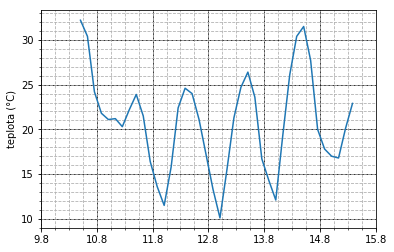

In [79]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, axes = plt.subplots()  # pro lepší nastavení potřebujeme získat odkaz na objekt třídy `Axes`
axes.xaxis.set_major_formatter(mdates.DateFormatter("%-d.%-m"))  # nastavení formátu hlavních popisek
axes.yaxis.set_major_locator(ticker.MultipleLocator(5))  # nastavení intervalu hlavního kroku na ose `y`
axes.yaxis.set_minor_locator(ticker.MultipleLocator(1))  # nastavení intervalu vedlejšího kroku na ose `y`
axes.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # nastavení intervalu vedlejšího kroku `x`
axes.set_xlim(times[0].date(), times[-1].date() + datetime.timedelta(days=1))  # nastavení rozsahu osy `x`
axes.grid(True, which="major", color="k")  # nastavení hlavní mřížky
axes.grid(True, which="minor", linestyle="--")  # nastavení vedlejší mřížky

axes.set_ylabel("teplota (°C)") # název osy `y`

plt.plot(times, temperatures) # a nyní můžeme konečně graf vykreslit

Skript pro vykreslení grafu má jen jediný povinný řádek, a to poslední s voláním metody `plot`.Vše ostatní je konfigurace vzhledu. Abychom mohli vzhled grafu nastavit, potřebujeme získat objekt representující tu část obrázku, která je řízena osami (kromě vlastních os do ní patří i mřížka, různé popisky, atd.).

Voláním funkce `mathplotlib.pyplot.subplots` získáme dvojici hodnot: jedna representuje obrázek jako celek (třída `Figure`), druhá pak výše zmíněný prostor daný osami (třída `Axes`). První je označena proměnou `fig` (díle už ji nevyužíváme), druhá pak proměnou `axes`.

Nad objektem os lze volat velké množství metod, z nichž využíváme ty, které nastavují popisky os (angl. *ticks* a mřížky). U osy `y` nastavuje interval hlavního kroku (popisek) na 5 a vedlejšího na 1 (stupeň Celsia).  Může se to zdát trochu složité, neboť parametrem těchto metod není číslo, ale objekt třídy `matplotlib.ticker.MultipleLockator`. *Matplotlib* však kromě fixního kroku podporuje i mnoho sofistikovanějších specifikací inetrvalů, které nemusí být konstantní.

U osy `x` nastavujeme interval vedlejších popisek na 6 hodin (interval hlavních popisek je automaticky 1 den, což nám vyhovuje). Upravíme i formát hlavních popisek (formát je shodný s metodou `datetime.datetime.strftime`, který již známe).

Poté nastavíme i mřížky (hlavní = *major* a vedlejší = *minor*). Specifikace vychází z frameworku Matlab a je pro začátečníky dost kryptická. Hlavní barvy jsou označeny jedním písmenem ('r' = *red*, 'b' = *blue*, černá je však `k`!), styl čar symbolicky pomocí běžných znaků ('--' je čárkovaní čára). Další možnosti viz např. https://python-graph-gallery.com/cheat-sheets/).

Zarovnání hlavních a vedlejších popisek na ose `x` vyžaduje, aby hodnoty na ose začínali v čase dělitelném šesti (0:00, 6:00, 12:00, 18:00). Zde je to dosaženo tím, že dolní limit je nastaven na půlnoc prvního dne (metoda `datetime.datetime` vrací objekt `datetime.date` representující půlnoc) a pro symetrii je nastaven i limit horní na půlnoc, která následuje za posledním časovým údajem (v případě půlnoci na následující půlnoc).

> ** Úkol**: Zobrazte do jednoho grafu očekávaný tlak (přepočtený na hladinu moře) a vlhkost. Obě veličiny se liší v řádech proto použijte sekundární osu `y`.

> Rada: viz https://matplotlib.org/gallery/api/two_scales.html

In [85]:
# tato část je beze znměny

import requests
import datetime    
    
endpoint = "http://api.openweathermap.org/data/2.5/forecast"
params = {  # slovník parametrů
    "q" : "Dobříň", # jméno lokality (nahraďte za místo Vašeho pobytu)
     "appid" : get_api_key("/home/fiser/credentials/open_weather_map"),
    "mode" : "json" # formát výstupu
}

data= requests.get(endpoint, params).json()   # načtení JSON dat a jejich převod do slovníku

# extrakce do pole hodnot s liší jen v použitém jménu klíčů u tlaku a vlhkosti (chybí také přepočet)
times = [datetime.datetime.fromtimestamp(item["dt"]) for item in data["list"]]
pressures = [item["main"]["sea_level"] for item in data["list"]]
humidities = [item["main"]["humidity"] for item in data["list"]]

print(pressures)
print(humidities)

[1023.64, 1024.46, 1026.84, 1030.22, 1033.35, 1035.13, 1035.46, 1035.65, 1036.17, 1037.14, 1037.17, 1039.1, 1037.07, 1038.84, 1033.88, 1032.82, 1033.69, 1034.81, 1035.32, 1035.46, 1034.95, 1033.69, 1031.54, 1029.38, 1027.99, 1027.59, 1026.95, 1026.49, 1026.17, 1025.37, 1023.41, 1024.36, 1019.88, 1020.22, 1020.53, 1021.51, 1023.04, 1023.79, 1023.7, 1023.58]
[52, 59, 72, 73, 65, 72, 56, 48, 49, 52, 64, 80, 65, 52, 44, 42, 43, 51, 62, 84, 64, 48, 39, 34, 42, 66, 70, 83, 70, 48, 36, 29, 37, 65, 82, 86, 93, 83, 61, 52]


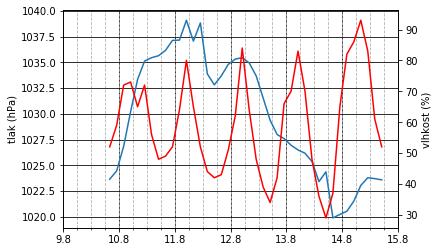

In [97]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, axes = plt.subplots()  # pro lepší nastavení potřebujeme získat odkaz na objekt třídy `Axes`
axes.xaxis.set_major_formatter(mdates.DateFormatter("%-d.%-m"))  # nastavení formátu hlavních popisek
axes.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # nastavení intervalu vedlejšího kroku `x`
axes.set_xlim(times[0].date(), times[-1].date() + datetime.timedelta(days=1))  # nastavení rozsahu osy `x`
axes.grid(True, which="major", color="k")  # nastavení hlavní mřížky
axes.grid(True, which="minor", linestyle="--")  # nastavení vedlejší mřížky

axes.set_ylabel("tlak (hPa)") # název osy `y`

axes.plot(times, pressures)

axes2 = axes.twinx() # přidáme druhou osu
# a pak ji nastavíme
axes.set_xlim(times[0].date(), times[-1].date() + datetime.timedelta(days=1)) # nutno nastavit i zde!
axes2.set_ylabel("vlhkost (%)")

axes2.plot(times, humidities, color="r")  # červeně pro odlošení

Vložení sekundární osy se provádí voláním metody `twinx` na objektu hlavních os. Vrací nový objekt os, který je možné do určité míry kustomizovat nezávisle. Nstavení limitů osy `x` musí však být stejné (a musí se explicitně uvádět, jinak se zvolí automatické, které překryje nastavení u primárních os). Lze dokonce nastavit i vlastní mřížku (výsledek však vypada strašně, ale zkuste si to).

## Vlastní třídy

I když Python nabízí ve svých standardních knihovnách velké množství tříd (minimálně stovky) a nezjistitelně velké množství tříd je v definováno v balících dostupných přes PiPY, stále existují reálné či myšlené objekty, pro něž prozatím neexistuje Pythonská třída, která by implementovala jejich model.

Naštěstí všichni uživatelé Pythonu si mohou vytvářet třídy vlastní. A není to ani tak složité. Složitý však může být implementovaný model (např. model vesmíru nebo nákupní model celebrity).

My však začneme něčím jednodušším. Budeme vytvářet velmi jednoduchý model kasičky (prasátka) do něhož můžeme vkládat libovolné peněžní prostředky. Pro jednoduchost budeme předpokládat, že kasička je bezedná tj. lze do ní vložit libovolné množství peněz (obecně je velmi složité zjistit, kolik prostoru peníze zaujímají).

Dále budeme předpokládat následující chování:
*  kasičky nelze vyjímat peníze, lze ji jen rozbít a získat tak najednou celou sumu
*  po rozbytí nelze kasičku už použít (nelze do ní vkládat peníze)

Z modelu je navíc zřejmé, že každý objekt kasičky (může existovat libovolné množství objektů kasiček) by měl podporovat dvě metody (modelující možné interakce s kasičkou):

1) metoda *pridej_penize* 

Tato metoda přijímá jako parametr obnos, což je kladné celé číslo (naše kasička nebude implementovat přidání zlomků základní pěněžní jednotky, pro koruny je to zbytečné). Přidáná suma není v našem modelu shora omezená (máme bezednou kasičku a koho by nepotěšilo například například přidání bilión korun).

Pokud bude vše v pořádku, metoda nemusí nic vracet (jen změní stav kasičky). Je však jasné, že může dojít k problémům. Za prvé se někdo může pokusit přidat zápornou částku (a pokusit se tak vytáhnout peníze z kasičky bez jejího rozbití). V realitě to nejde, ale v Pythonu nezabráníme použití záporné hodnoty v parametru.

Dalším typem problematického přidání je vkládání peněz do rozbité kasičky. To je podle našeho modelu nepřípustné (a ani v realitě to není snadné).

Protože při běžném použití kasičky by k těmto problematickým voláním mělo docházet jen zřídka, budeme tito situace řešit výjimkou (výjimka by měla být reakce na výjimečnou situaci). Rozhodně nemůžeme tyto situace v ignorovat a to ani v počáteční fázi, neboť uživatelé by začali kasičku využívat "netradičně", a pak by byli překvapeni, že v nové verzi jim to nefunguje (uživatelem můžete být samozřejmě i autor třídy, obecně jsou to však jiní lidé).

Ve skutečnosti jsme však nevyřešili všechny možné nedefinované či okrajové příklady. Co například přidání nulové částky? Je to trochu netradiční, ale můžeme to povolit (nemění to stav kasičky). Jak se postavíme k předání jiného než celočíselného (`int`) objektu. Můžeme se snažit přidat cokoliv:  číslo v pohyblivé řádové čárce (to by nemusel být takový problém), komplexní číslo (kasička s imaginární jednotkou korun?), řetězce, seznamy, jiné kasičky (ty mohou obsahovat jiné kasičky, takže můžeme dostat celý řetězec kasiček, navíc do kasičky lze vložit odkaz na sebe sama, to už je hluboký filozofický problém). I když běžné kasičky nejsou tak striktní (lze do nich vkládat i jiné věci než peníze), my všechny neceločíselné objekty zakážeme (při pokusu o přidání vyvoláme výjimku).

2) metoda *rozbij*

Tato metoda je mnohem jednodušší. Pokud není kasička rozbitá, pak ji rozbije (= změní její stav) a vrátí celkovou naspořenou částku (může to být i nula). Pokud je již rozbitá, pak vyvoláme výjimku (nemůžeme získat peníze z již rozbité kasičky!). Žádná další možnost již není (metodě nic nepředáváme, takže její výsledek je určen pouze stavem objektu)

Nyní již máme vše připraveno k implementaci:

In [26]:
class Kasicka: # hlavička třídy
    def __init__(self):  # konstruktor
        self.castka = 0  # (počáteční) nastavení atributu
        self.rozbita = False # (počáteční) nastavení atributu
    def pridej_penize(self, castka):  # metoda
        if not isinstance(castka, int):
            raise Exception("Částka není celé číslo")
        if castka < 0:
            raise Exception("Částka je záporná")
        if self.rozbita:
            raise Exception("Kasička je rozbitá")
        self.castka += castka  # vlastní kód metody: zvýšení uložené částky o předanou částku
    def rozbij(self):
        if self.rozbita:
            raise Exception("Kasička je rozbitá")
        self.rozbita = True
        return self.castka # a nezapomeneme vrátit konečný stav peněz

Implementace třídy začíná hlavičkou, která po kličovém slově `class` uvádí jméno třídy. V Pythonu neexistuje zcela jednotný úzus ohledně identifikátorů třídy. Klíčový dokument [PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/#class-names) doporučuje jména začínající velkým písmenem, bez použití podtržítek na  místě mezer (nová slova začínají velkým písmenem). Tuto konvenci budeme dodržovat. 

Jména vestavěných tříd (např. `int`, `str`) však tuto konvenci nedodržují, neboť jejich jména jsou úzce spojena se stejnojmenými vestavěnými funkcemi. Podobný zápis se však využívá i u tříd standardní knihovny (například `datetime.datetime`), kde je využíván pravděpodobně z historických důvodů.

Hlavička třídy končí dvojtečkou, takže je jasné, že bude následovat odsazený blok (tzv. tělo třídy). Ten obsahuje definice metod, což jsou ve skutečnosti funkce volané nad objekty dané třídy.

První z metod má podivný název `__init__` (dvě podtržítka na začátku a dvě na konci!). Metody začínající a končící dvěma podtržítky (v Pythonské slangu speciální, magické respektive *dunder* metody) mají v Pythonu pevně definovaný význam a téměř nikdy se nevolají přímo tj. zápisem `objekt.__method__()`.

Metoda označená `__init` je tzv. **konstruktor**. Tato metoda se volá při vytváření/konstrukci objektu a její funkcí je vytvořit atributy objektu (definující jeho stav) a jejich inicializace tj. nastavení na počáteční hodnotu.

Prvním parametrem konstruktoru je nově vytvořený, ale prozatím ještě prázdný a neinicializovaný objekt. Tento paarmetr se v Pythonu vždy označuje jménem `self` (vždy odkazuje na objekt nad kterým je metoda volána, resp. k níž patří tj. jakoby na sebe sama). 

Poznámka: Použití jména `self` není vynucováno překladačem (formálně může být použito jakékoliv jméno bez vypsání chyby). Je to však tak silná konvence, že její narušení se chápe jako závažná stylistická chyba. Je to podobné použití hovorového či dokonce vulgárního tvaru ve formálním dokumentu. Neovlivňuje to sice jeho čitelnost, může však vést k jeho odmítnutí komunitou (zde tedy ostatními programátory).

Náš konstruktor nemá žádné další parametry, neboť bude vytvářet objekty s identickým obsahem. Náš nový objekt kasičky (dočasně označený proměnou/parametrem `self`) bude obsahovat dva atributy (atribut je něco jako interní proměnná spojená s daným objektem). Nejdříve nastavíme atribut částka (`self.castka`) tak, aby označoval objekt nula (třídy `int`), neboť kasička je na začátku prázdná (= obsahuje O jednotek měny).

Druhý atribut `self.rozbita` určuje zda je kasička rozbitá (= `True`) nebo nikoliv (= `False`). Je zřejmé, že nové kasičky se nevyrábějí rozbité (tj. atribut má na počátku hodnotu `False`). 

Tím máme objekt plně inicializovaný. Vytváření objektu můžeme hned vyzkoušet. Objekt třídy se vytvoří použitím jména třídy jako funkce (s případnými parametry v kulatých závorkách). 

In [9]:
prasatko = Kasicka() # vznikne nový objekt odkazovaný proměnnou `prasatko`

Pro kontrolu lze vypsat hodnoty atributů nového objektu.

In [10]:
print(prasatko.castka)
print(prasatko.rozbita)

0
False


Další metodou je metoda přidávající peníze do prasátka (`pridej_penize`). I tato metoda stejně jako všechny metody nad objektem musí mít první první parametr `self`. Parametr označuje objekt, nad nímž se metoda volá (při volání je vlevo od tečky). V tomto případě však má i další parametr (`castka`), který se při volání předává běžným způsobem tj. v seznamu parametrů.

Metoda může ve svém, těle využívat libovolné atributy a metody objektu. Může samozřejmě měnit i hodnoty atributů (mohou začít odkazovat na nové objekty či se změní odkazované objekty). V našem případě zvýšíme hodnotu atributu `self.castka` o číselnou hodnotu, jež je označena parametrem `castka`.

I když má atribut stejné jméno jako parametr, jedná se o dvě různé proměnné (resp. označení). Zatímco parametr `castka` zanikne ihned pro dokončení volání metody (je to lokální proměnná), atribut existuje tak dlouho jako objekt, k němuž patří (tj. volání metody určitě přežije).

Podívejme se na obrázek, který zobrazuje na co odkazují proměnné a atributy na začátku těla metody `pridej_penize` při jejím volání na prázdný objekt (odkazovaný globální proměnou `prasatko`) s přidávanou částkou 10.

In [5]:
prasatko.pridej_penize(10)

![Proměnné, parametry a atributy při volání metody](refinmethod.png)

Jak lze vidět, objekt třídy odkazován dvěma proměnnými: globální proměnnou `prasatko` (platí v celém Jupyter notebooku) a prvním parametrem `self`. Uvnitř metody však používáme jen lokální proměnné a parametry, nebo uvnitř metody nevíme jaké existují globální proměnné resp. jaké objekty právě označují).  Stačí vědět, že parametr `self` označuje objekt, s nímž máme pracovat. Objekt samotný odkazuje pomocí svých atributů na další dva podobjekty (ty jsou primárně dostupné jen přes svůj rodičovský objekt). Všimněte si, že výraz `castka` (použije se parametr `castka`) odkazuje jiný objekt, než výraz `self.castka`.

> **Úkol**: Jak se obrázek změní po přidání/přičtení částky (tj. na konci metody)?

Atribut `self` částka bude ukazovat na objekt `int:10`. Ten může být sdílen s parametrem `castka` nebo se může jednat o další kopii. Oba přístupy jsou identické, neboť objekty čísel nelze měnit. Jak bylo řečeno dříve, u malých čísel Python preferuje sdílení. 

Nový graf proměnných a objektů lze vidět na následujícím obrázku (objekt int:0 je šedý, neboť jej již nikdo neoznačuje a je tak de iure neexistující).

![Proměnné, parametry a atributy při volání metody, stav 2](refinmethod2.png)

> **Úkol:**: Jak vypadá systém proměnných po dokončení volání funkce (po návratu do globálního kontextu)?

Po návratu zanikne lokální kontext a a všechny jeho (lokální) proměnné (`self` a `castka`). Objekt (a jeho podobjekty) však nezaniknou, neboť jsou odkazovány (označeny) proměnnou `prasatko`. Stav ukazuje poslední obrázek.

![Proměnné, parametry a atributy při volání metody, stav 3](refinmethod3.png)

Vraťme se ještě k metodě `pridej_penize`, která ještě před vlastní akci zvýšení uložené částky kontroluje přípustnost daného volání.

Nejdříve kontroluje, zda je předaný objekt třídy `int`. K tomu využívá vestavěnou metodu `isinstance`. Ta očekává dva parametry: objekt a třídu. Vrací `True` je-li objekt instancí dané třídy.

In [11]:
isinstance(2, int)

True

In [12]:
isinstance("Eldar", str)

True

In [13]:
isinstance(prasatko, Kasicka) # je prasátko kasičkou

True

Pokud není objekt předaný jako parametr třídy `int`, pak je vyvolána výjimka pomocí příkazu `raise`. Příkaz `raise` přeruší vykonávání programu a pokud program na výjimku nezareaguje (to zatím ještě neumíme) pak je i ukončen. Argumentem je nově vytvářený objekt výjimky (zde základní třídy `Exception`).

> **Úkol**: Ověření na základě příslušnosti ke třídě `int` není optimální. Proč? Jak to napsat lépe?

Problémem je skutečnost, že celá čísla mohou být representována i pomocí objektů třídy `float` (a dokonce i dalšími jako je `complex` nebo `fraction`). Základní možností je pokusit se o přetypování na celé číslo a zpět. Pokud obdržíme původní hodnotu, pak lze číslo representovat jako `int` a je tudíž celé. Bylo by to však nutné provést pro všechny potenciální číslené typy schopné uchovávat celá čísla. V praxi by tak mohlo stačit využití vestavěné metody `is_integer` třídy *float*.

In [16]:
# testovací prográmek
x = 10.0  
# zkuste i použití zlomeku, zamyšlete se nad výsledkem a jeho použitelností
# import fractions
# x = fractions.Fraction(6,2)
if isinstance(x, int) or x.is_integer():
    print("Celé číslo")

Celé číslo


Testování dalších dvou podmínek použitelnosti metody je jednoduché (kladnost přidané částky a stav nerozbytí).

Stejně tak jednoduchá je i implementace metody pro rozbití kasičky (kontrola a následná změna jediného atributu). Nynínovou třídu vyzkoušímě (a pro jistotu si vytvoříme novou kasičku).

In [21]:
k = Kasicka() # vytvoříme
k.pridej_penize(1_000_000) # přidáme pár korun
k.pridej_penize(1)  # a ještě jednou
print(k.rozbij()) # rozbijeme a vypíšeme celkovou sumu

1000001


Musíme vyzkoušet i problematická (nepřípustná volání)

In [23]:
k = Kasicka()
k.pridej_penize(-10)

Exception: Částka je záporná

Program skončil s výjimkou, ale kasička stále existuje (v notebooku existují všechny vytvořené, dokud notebook neuzavřeme)

In [24]:
k.rozbij()

0

In [27]:
k.pridej_penize(100)

Exception: Kasička je rozbitá

#### Zapouzdření

V popisu požadovaných rysů kasičky jsem kladl velký důraz na to, že dokud kasičku nerozbijeme, nelze zjistit kolik peněz obsahuje. To však není evidentně pravda:

In [30]:
k = Kasicka() # vytvoříme novou
k.pridej_penize(100)

print(k.castka)

100


Nyní víme, že v kasičce je 100 korun, ale přesto jsme ji nerozbili.

Situace je však ještě horší.

In [32]:
k.castka = 0

To je vykradení kasičky za bílého dne! Může však být ještě hůře: 

In [34]:
k.castka = -100

Nyní máme kasičku zadluženku (tj. kasička do níž lze vkládat např. služní úpisy). Podobně můžeme z rozbité kasičky udělat nerozbitou (je to lepší než oprava, nedokážeme totiž rozlišit zda je skutečně nerozbytá nebo znovuskříšená i s původním obnosem).

Jak je to vůbec něco takového možné?

Důvod je jednoduchý. V Pythonu je dáno pouze dohodou, co smíme dělat (co je košer) a co nikoliv (co je hucpe).

**Obecná dohoda je taková, že můžeme volat pouze metody (ať již přímo či nepřímo). Ty musí být napsány tak, že nevznikne žádný nedefinovaný stav. Naopak atributy by neměly být vně metod dané třídy použité.**

Tato dohoda vychází ze základního principu objektově orientovaného programování. S objekty lze interagovat pouze pomocí volání metod z veřejného rozhraní. Interní (datová) representace (tj. struktura atributů) je naopak skrytá.

Tento princip se označuje jako **zapouzdření** (angl. *encapsulation*). Cílem zapouzdření není skrýt (tajná) data, ale zabránit závislosti okolního kódu na struktuře a zamezit nepřípustné modifikaci interních dat (viz dluhová kasička). 

Tento princip lze vysvětlit na náramkových hodinkách. Veřejným rozhraním je ciferník, je standardizovaný a běžně se nemění.  Vnitřní mechanismus je skrytý. Pokud by byl snadno viditelný pak by vnější pozorovatel mohl obejít ciferník a využívat pouze vnitřní informace (např. pozice ozubených koleček). Tato (nechtěná) závislost by vedla ke zbytečně složitému algoritmu přístupu (kolečka nejsou primárně určena pro zobrazení času), neautorizovaným změnám (není překvapivé, že po vyjmutí pár koleček nemusí hodinky fungovat a navíc asi přijdeme i o záruku) avšak především by téměř znemožnila upgrade interního mechanismus hodinek (poN přehodu na digitální technologii, již nelze kolečka pro čtení hodinek využívat, naopak ciferník může zůstat beze změny).

Některé jazyky si zapouzdřenost vynucují automaticky, jiné mají nástroje jak si zapouzdřenost vynutit explicitně pro danou třídu, Python předpokládá, že programátoři jsou dospělí a tak vědí co činí (resp. co by činit neměli).

V některých případech však základní rozdělení na veřejné metody a skryté atributy nestačí. Relativně často se používají pomocné metody, které nejsou součástí veřejného rozhraní, ale používají se výhradně v ostatních metodách (v zásadě je to dodání další skryté vrstvy schované ještě pod veřejným rozhraním).

Tyto metody lze vyznačit tím, že se na začátku jejich identifikátoru použije jedno podtržítko. V tomto případě pomůže trochu i Python, který trochu zkomplikuje jejich volání z vnějšku (zabrání se tak nechtěnému použití).
Signifikantnější je však neuvedení popisu metody ve veřejné dokumentaci (co není popsáno, jako by nebylo).

Na druhou stranu některé objekty nabízejí veřejné atributy. Zde je situace jasná. Atribut je veřejný jen tehdy, když je explicitně zmíněn v dokumentaci. Dokumentace také určuje, zda je pouze pro čtení (typičtější případ) nebo i pro zápis. 

Principy zapouzdření i jednoduchého objektového návrhu si ukážeme na komplexnějším příkladě.

**Řešený příklad**

Typickou úlohou v geograficky orientovaných informačních systémech je hledání nejbližších cest mezi dvěma místy, s využitím mapových podkladů. To je samozřejmě dosti komplexní problém a proto, si ho zjednodušíme.


Budeme proto hledat spojení jen mezi omezeným počtem míst (řekněme třeba mezi městy), jejichž (nejkratší) přímou vzdálenost zadáme ručně (pomocí volání metody).

Nejdříve zkusíme navrhnout rozhraní objektů třídy `Place` (tato třída může být používána v reálných aplikacích, takže volíme anglické identifikátory):

* konstruktor: parametrem je jméno místa a jeho poloha (zeměpisná šířka a délka)
* metoda pro přidání přímého spojení `add_connection`, parametrem je cílové místo a vzdálenost
* metoda pro hledání délky nejkratšího spojení `distance`, parametrem je cílové místo. Metoda najde nejkratší spojení (to může procházet více místy) a vrátí jeho vzdálenost. 

Zeměpisná poloha předávaná v konstruktoru se nepoužívá pro výpočet vzdáleností (vzdálenosti jsou v našem modelu skutečné dopravní vzdálenosti, nikoliv vzdušné vzdálenosti). Použijeme ji později pro nakreslení jednoduché mapy.

Obě metody pracující se spojením očekávají jako parametr objekt třídy `Place`, representující cíl. Obě metody tak pracují se dvěma objekty třídy `Place`. Je to jednak objekt dostupný v metodě pomocí parametru `self` (adresát metody = objekt, na nějž je metoda volána) representující počátek spojení, jednak objekt předaný jako běžný parametr representující cíl spojení. 

Tj. předpokládáme-li, že proměnné `decin` a `teplice` označují objekty příslušných měst, pak bude lze využít následujících volání:

```python
decin.add_connection(teplice, 21) # 35km z Děčína do Teplic
print(decin.distance(teplice))  # vypíše 35km  
```

Navržené rozhraní má určitý nedostatek, který jste už možná zaznamenali. Pokud existuje přímé spojení z bodu A do B, pak s vysokou pravděpodobností existuje i stejně dlouhé spojení v opačném směru (většina dopravních spojení je obousměrná). Bylo by tedy užitečné, kdyby se při přidání spojení automaticky přidalo i spojení opačným směrem. Na druhou stranu výjimečně může existovat i přímé spojení jen jedním směrem, resp. obě spojení mmohou mít různou délku.

Řešením je přidání dalšího parametru `bidi` (relativně běžně používaná zkratka za *bidirectional*) k metodě `add_connection`. Pokud bude mít hodnotu `True` pak se automaticky vloží i spojení opačným směrem (při `False` nikoliv). Navíc zde můžeme použít implicitní hodnoty parametru. Pokud ji nastavíme na `True`, pak se při běžném použití nebude vůbec uvádět (a použití bude identické s výše uvedeným příkladem).  Pokud bude výjimečně potřeba zadat jednodměrné spojení, bude volání o něco delší, ale stále přehledné (hlavně použijeme-li pojmenovaný parametr).

```python
usti.add_connection(teplice, 21, bidi=False) # umělý příklad (spojení není ve skutečnosti jednosměrné)
```

Po návrhu rozhraní, musíme navrhnout i datovou representaci objektů míst. Jednoduché je to u jména a polohy místa, neboť každé místo bude míst jen jedno jméno, jednu zeměpisnou šířku a jednu zeměpisnou délku. Tj. stačí vytvořit tři atributy objektu, které budou označovat/odkazovat příslušné hodnoty (řetězec a dvě čísla třídy `double`).

Složitější je representace přímých spojení. Každé místo může mít totiž obecně neomezený počet spojení. Navíc spojení není jednoduchá hodnota, ale minimálně hodnoty dvě (identifikace cílového místa a vzdálenost, počáteční místo je dáno umístěním dané informace). Musíme proto využít nějaké kolekce.

Klíčovou kolekcí v Pythonu je seznam. Proto ověříme nejdříve jeho použitelnost.

Za prvé potřebujeme ukládat dvojice hodnot. To lze zařídit, neboť položkami seznamu mohou být (vnořené) seznamy resp. jiné kolekce. Pokud bychom takový seznam vytvářeli ručně, pak by například mohl mít tento tvar (proměnné označují příslušné objekty):

```python
spojeniZDecina = [[usti, 15], [teplice, 21], [rumburk, 43], ...] # seznam seznamů
```

#### N-tice

Namísto vnořených seznamů lze využít tzv. n-tice (angl. *tuple*), což je uspořádaná kolekce optimalizovaná pro malý počet prvků, která je navíc nemodifikovatelná (po vytvoření do ní nelze přidávat prvky, či prvky zaměňovat). N-tice se na rozdíl od seznamů uzavírají do kulatých závorek (ty lze v některých případech vynechat, v následujícím zápise to však možné není, jistě poznáte proč).

```python
spojeniZDecina = [(usti, 15), (teplice, 21), (rumburk, 43), ...] # seznam dvojic
```

Tato implementace se jeví jako rozumná. Není přirozeně zcela dokonalá. Pokud například chcete v našem seznamu vyhledat vzdálenost do Rumburku, musíme postupně procházet jednotlivé prvky a hledat ten, jehož první položka je rovna hledanému místu. Teprve pak můžeme vrátit příslušnou vzdálenost. Můžeme si na však to připravit funkci (parametr `key` je hodnota kterou hledáme, v prohledávaných dvojicí musí být vždy uváděna jako první):

In [1]:
def get_value(listOfpairs, key):
    for k, v in listOfpairs: # postupně procházíme dvojice
        if k == key:
            return v
    return None # pokud nic nenajdeme vrátíme `None`

Novinkou kódu je uvedení dvojice proměnných na místě řídící proměnné cyklu `for`. Je to obdoba paralelního přiřazení. Hodnota dvojice z procházeného seznamu je přiřazena do dvojice proměnných (i kolem této dvojice je možno napsat závorky stejně jako u n-tic).

Alternativně lze dvojice ukládat pomocí slovníku (`dict`). Pro malý počet dvojic (řádově jednotky) to  však není příliš efektivní (slovník je optimalizován pro větší množiny).  

Třídu můžeme implementovat přímo v Jupyter notebooku, není to však pohodlné. Kód třídy musí být celý obsažen v jediné vstupní buňce, což je při jeho rozsahu (několik desítek řádek) nepřehledné.

Proto zkusíme třídu naprogramovat v editoru `pycharm`. Podle návodu v první kapitole vytvořte projekt `cities` (jméno projektu nehraje v Pythonu žádnou roli, slouží pouze pro organizaci skriptů v editoru). V rámci projektu vytvořte soubor `cities.py`. Jméno souboru musí mít příponu `py`. Vlastní jméno souboru (bez přípony) se používá jako jméno modulu při importování (takže je vhodné volit krátké, ale přitom dostatečně jednoznačné jméno).

Do editoru vložte nejdříve tento text (poznámky přepisovat nemusíte):

```python
class City:
    def __init__(self, name): # konstruktor
        self.name = name      # do objektu uložíme jméno města
        self.connections = [] # seznam spojení z města je zatím prázdný

    def add_connection(self, target, distance, bidi=True):
        self.connections.append((target, distance))  
        # přidáme dvojici (město, vzdálenost) do seznamu
        if bidi:  # je-li spojení obousměrné
            target.add_connection(self, distance, bidi=False) # vložíme i opačný směr
```

**Úkol**: Co se stane, pokud by se v implementaci metody `add_connections` vkládalo opačné spojení voláním metody add_connection s implicitní hodnotou parametru `bidi` (tj. s hodnotu `True`).

Předpokládejme, že vkládáme obousměrné spojení mezi městy v proměnných `a` a `b`, tj. použijeme volání `a.add_connection(b, 1, bidi=True)`.
Parametr `bidi` určuje, že musí být volán i opačný směr tj. uvnitř metody `add_connection` dojde k (rekurzivnímu) volání tvaru `b.add_connection(a, 1, bidi=True)`. Protože i toto volání by bylo nastaveno jako obousměrné, vedlo by opět k novému rekurzivnímu volání metody `add_connection` tentokrát opět v původním gardu tj, `a.add_connection(b, 1, bidi=True)`. I toto volání by však využilo vložení spojení v opačném směru (tj. v podobě  `b.add_connection(a, 1, bidi=True)`). Nyní by Vám již mělo být jasné, že řetězec volání je nekonečný, neboť přidání spojení na jedné straně by vedlo k přidání na straně druhé a tak dále.
Výše uvedená implementace však opačný směr přidává jako jednosměrný a řetězec je tak ukončen ihned po druhém volání.

### Algoritmus hledání nejkratší cesty

Před konečnou implementací nám zbývá promyslet implementaci metody `distance`.  Implementace není zcela jednoduchá neboť vyžaduje alespoň základy algoritmického myšlení tj. abstrakce univerzálně použitelných postupů pro řešení matematicky definovaných problémů.

Jak najdeme nejkratší spojení do vzdáleného města v reálném životě. Pokud máme k dispozicí mapu pak většinou stačí jediný pohled a danou cestu nalezneme (pokud bereme v potaz jen hlavní klíčové silnice tj. v našem případě silnice druhé a vyšší třídy).  Můžeme se sice splést (například v hledání cesty z Ústí do Teplic nemusí být zřejmé zda jet přes Chlumec nebo přes Řehlovice), ale chyba bude jen malá (v praxi má větší vliv kvalita silnic a aktuální dopravní situace).

Tento přístup však nelze pro náš účel použít, nemáme totiž žádné informace o vzájemné pozici měst ani globální pohled na strukturu silnic (odkud, kam a přes jaká města silnice vedou). 

Zkusíme proto strategii nepříliš inteligentních, ale vytrvalých a partogeneticky se rozmnožujících mravenců. Navíc všichni tito mravenci běhají stejnou konstantní rychlostí (třeba kilometr za den).

Nejdříve položíme jediného mravence do počátečního města. Protože je jejich partogenetické rozmnožování úžasně rychlé, je pro něj záležitostí zanedbatelného okamžiku zplodit tolik nových mravenců, kolik spojení vychází z počátečního města. Nově zrození  mravenci se ihned rozbíhají po těchto spojích. Mravenec rodič (tj. defacto praotec) zůstává v počátečním městě, kde (dožívá) ve štěstí a blahobytu (rozmnožování mu bohužel sebralo dost sil).

Pokud děti a případně i vzdálenější potomci (vzdálenější ve smyslu příbuzenství) dorazí do dalšího města pak jejich chování záleží na dvou okolnostech.

Pokud tam dorazí jako první a město je cílové, pak on a jeho předci vyhráli (štafetový) běh a my známe nejkratší vzdálenost mezi počátečním a cílovým městem (je dáno časem jejich vítězného doběhu, neboť rychlosti jsou konstantní a čas na rozmnožování je zanedbatelně malý). Pokud si mravenci-předci předávali i jména měst, kterými prošli, pak známe i nejkratší cestu.

Pokud mravenec dorazí jako první a město není cílové, pak se zachová jako praotec.  Porodí tolik mravenců, kolik je spojení z daného města a ihned je na tato spojení vyšle. Sám zůstává a dožívá v naději, že některý z jeho potomků vyhraje (jistotu však samozřejmě nemá).

Nejsmutnější je situace, kdy mravenec do některého z měst nedorazí jako první (což se pozná snadno, neboť ve městě stále dožívá první pokořitel daného města). V tomto případě je totiž zřejmé, že on resp. jeho případné potomci již nemohou vyhrát (potomci prvního mravence již vyrazily dávno předtím). Nezbývá mu nic jiného než spáchat sebevraždu (samozřejmě bez jakéhokoliv rozmnožování).

Algoritmus běžně končí tím, že první mravenec dorazí do cílového města. Další sledování mravenců je pak samozřejmě zbytečné (nakonec všichni zbývající stejně spáší sebevraždu). Pokud je však cílové město z počátečního města nedosažitelné (což by se ve Střední Evropě stávat nemělo) končí algoritmus jinak (jedním z konkurenčních výhod dobrého programátora je schopnost vidět i tyto okrajové následky).

> **Úkol**: Jak končí algoritmus mravenců-průzkumníků v případě nedosažitelnosti cílového města?

Počet mravenců dále nenarůstá (nevznikají noví) a zbývající (nesmrtelní) mravenci zůstávají ve všech městech dosažitelných z počátečního (vždy jeden).

Tento algoritmus je relativně snadno pochopitelný, **nelze** jej však bohužel přímo realizovat v běžném počítači. V jednom okamžiku totiž mezi městy pobíhá větší počet mravenců, z nichž každý by pro svou programovou representaci vyžadoval nezávislý procesor, neboť jejich činnosti tj. především rozmnožování musí být zcela nezávislé na ostatních mravencích (a to i v případě, že by přesun do města či dožití by byli representovány pouze čekáním na určitý čas bez nutnosti využití procesoru). Současné počítače sice běžně obsahují více procesorů (jader). Jejich počet je však fixní a relativně malý (bylo by podivné, pokud byste byli nuceni kupovat počítač s desítkami procesorů pro nalezení nejkratší cesty v dopravním systému mezi několika městy).

Algoritmus tak musíme trochu upravit. Namísto velkého množství rozplozujících se mravenců, použijeme jen jednoho, který však musí mít schopnost teleportace a musí být gramotný.

Tento mravenec je na začátku v počátečním městě. Zjistí si všechna přímá spojení, avšak namísto aby se do některého z nich vydal si je zapíše do svého turistického pořádníku. Napíše si odkud by se měl vydat a kam by měl dorazit. Na pořádí záznamu nezáleží.

Navíc si vytvoří tabulku, v níž má u každého města poznamenanou nejmenší ověřenou vzdálenost od města startovního. Na začátku obsahuje u startovního nulu a u všech ostatních nekonečno (náš mravenec umí dokonce i ležatou osmičku). 

Nyní vše běží ve velké smyčce. Mravenec se podívá do svého turistického pořadníku a teleportuje se do místa, ze kterého vychází první přímé spojení v pořadníku. To spojení projde a tím zjistí vzdálenost. Nezapomene samozřejmě projité spojení odstranit z pořadníku.

Poté se podívá se do tabulky. Sečte minimální vzdálenost města, odkud vycházelo právě projité přímé spojení, s ujitou vzdáleností. Pokud je tato vzdálenost menší než aktuální minimální vzdálenost města, v němž se právě nachází, pak najde všechna spojení vycházející z tohoto místa a zapíše si je do pořadníku (opět dvojici odkud a kam). Navíc přepíše minimální vzdálenost aktuálního místa v tabulce. V opačném případě (součet vzdáleností je větší) nemusí v tomto kroku provádět nic.

Nyní se vrátíme znovu na počátek smyčky. Pokud je pořadník prázdný pak algoritmus končí. Jinak se mravenec teleportuje do místaze kterého vychází první přímé spojení v pořadníku. To spojení projde a tím zjistí vzdálenost. Nezapomene samozřejmě projité spojení odstranit z pořadníku.

Poté se podívá se do tabulky. Sečte minimální vzdálenost města, odkud vycházelo právě projité přímé spojení, s ujitou vzdáleností. Pokud je tato vzdálenost menší než aktuální minimální vzdálenost města, v němž se právě nachází, pak najde všechna spojení vycházející z tohoto místa a zapíše si je do pořadníku (opět dvojici odkud a kam). Navíc přepíše minimální vzdálenost aktuálního místa v tabulce. V opačném případě (součet vzdáleností je větší) nemusí v tomto kroku provádět nic.

Nyní se vrátíme znovu na počátek smyčky. Pokud je pořadník prázdný pak algoritmus končí. Jinak se mravenec teleportuje do místa, ze kterého vychází první přímé spojení v pořadníku, ....

I když to na první pohled nemusí být zřejmé cyklus nakonec skončí (mravenec si od jisté chvíle již nezapíše nové spojení do svého pořadníčku a ten se tak nakonec vyprázdní). Navíc určitě prošel i minimální cestou, Opakuje totiž všechny cesty svých vzorů, kteří používali strategii "nas mnogo" (a v případě potřeby nás může být ještě víc). Minimální vzdálenost najde v tabulce  v řádce cílového města. V nejhorším případě tam nalezne ležatou osmičku (pokud cílové město není ze startovního dosažitelné).

Algoritmus lze samozřejmě ještě zjednodušit. Pokud známe předem délku všech přímých spojení, pak je zbytečné aby se mravenec teleportoval. Vše snadno zjistí doma pomocí tužky a papíru (jen připisuje a ruší záznamy ve pořadníku a případně snižuje hodnoty v tabulce měst). To však může provádět i počítač a to pravděpodně značně rychleji. Proto můžeme eliminovat i onoho geniálního zástupce řádu blanokřídlých.

Navíc lze v tomto případě algoritmus i mírně optimalizovat, neboť jste si jistě všimli, že mravenci procházeli i spojení, u nichž bylo již v okamžiku startu jasné, že nebudou nejrychlejší (koncové město spojení bylo dosaženo již před startem průchodu spojením). Speciálním případem těchto zbytečných průchodů je návrat do místa, z něhož vyšel předek (resp. předci). Tyto případy lze za pomoci tabulky aktuálních minimálních vzdáleností snadno eliminovat, neboť je nemusíme zařazovat do pořadníku.

Dalším vylepšením je eliminace počátečního místa spojení v položce pořadníku, namísto toho stačí uvádět jen vypočtenou minimální vzdálenost, která může (ale nemusí) nahradit minimální vzdálenost v tabulce.

Poslední navržený algoritmus vyžaduje dvě pomocné struktury.

*pořadník*: seznam dvojic naplánovaných průchodů spojeními (koncové město spojení, a nabízená minimální délka spojení). Do seznamu/pořadníku přidáváme na konec a vyjímáme (zpracování+smazání) na začátku. Seznam do něhož přidáváme prvky na konci a vyjímáme je postupně na druhé straně (= počátku) se běžně označuje jako **fronta**).

*tabulka*: záznam o minimální vzdálenosti pro každé město. Lze použít seznam dvojic (jméno města, minimální vzdálenost), ale to je dost nepohodlné v případě změny minimální vzdálenosti. V tomto případě by bylo nutné původni dvojice odstraňovat. Naštěstí Python podporuje velké množství různých specializovaných kolekcí, z nichž si vybere téměř každý.

#### Slovník s nastavenou implicitní hodnotou

Nám se bude hodit kolekce `collections.defaultdict`, která efektivně ukládá dvojice (klíč, hodnota), včetně rychlého hledání hodnot podle klíče a jejich modifikace (v našem případě je klíčem město a hodnotou aktuální minimální vzdálenost). Navíc (na rozdíl od běžného slovníku) podporuje implicitní hodnotu pro klíče, které se ve slovníku nenachází. To se nám hodí, neboť náš algoritmus předpokládá, že město, které ještě nebylo dosaženo při hledání nejkratší cesty má vzdálenost nekonečnou (třída `float` umožňuje representovat i nekonečné hodnoty).

Slovník s implicitní hodnotou si vyzkoušíme na jednoduchém příkladě. Klíčem bude jméno studenta (řetězec), hodnotou informace o tom zda splnil podmínky zápočtu. Pokud jméno studenta ve slovníku není, pak se předpokládá, že zápočet nemá.

In [2]:
from collections import defaultdict

def implicit_value(): # tzv. tovární funkce produkující implicitní hodnoty
    return False

zapocty = defaultdict(implicit_value) # vytvoření slovníku (s registrací tovární funkce)
zapocty["Novák"] = True    # přidání dvojice (jméno, výsledek)
zapocty["Nejezchleba"] = False # přidání další dvojice

print( zapocty["Novák"]) # vypíše uloženou hodnotu pro klíč "Novák", což je True
print( zapocty["Nejezchleba"])  # pro jistotu vyzkoušíme i druhou uloženou hodnotu

print( zapocty["Snedlditetikasi"])  # vypíše hodnotu vracenou tovární metodou (= False)

True
False
False


**Úkol**: Vyzkoušejte, nahradit slovník `defaultdict` běžným slovníkem `dict`. (konstruktor běžného slovníku je vestavěný a nemusí mít žádné parametry).

In [3]:
from collections import defaultdict

def implicit_value(): # tzv. tovární funkce produkující implicitní hodnoty
    return False

zapocty = dict() # běžný slovník
zapocty["Novák"] = True    # přidání dvojice (jméno, výsledek)
zapocty["Nejezchleba"] = False # přidání další dvojice

print( zapocty["Novák"]) # chování je shhodné jako u slovníku s implicitní hodnotou
print( zapocty["Nejezchleba"])  # dtto

print( zapocty["Snedlditetikasi"])  # přístup k neexistující hodnotě však vede k výjimce

True
False


KeyError: 'Snedlditetikasi'

Nyní se vraťme k implementaci metody `distance` třídy `city`. Implemantace výše popsaného algoritmu je relativně přímočará. 

```python
import math
from collections import defaultdict


def infinity_factory(): # tovární funkce pro vracení nekonečen
    return math.inf


class City:
    def __init__(self, name): # konstruktor
        ... # viz výše

    def add_connection(self, target, distance, bidi=True):
        ...  # viz výše

    def distance(self, target):
        # pořadník s plánem přesunu do startovního města (=self)
        waiting_list = [(self, 0)]
        # prázdná tabulka (nekonečné vzdálenosti)
        mindist = defaultdict(infinity_factory)
        while waiting_list: # dokud není pořadník prázdný
            # vyjme a vrátí první dvojici (další testovaný cíl, dosžitelná vzdálenost)
            goal, sum_distance = waiting_list.pop()
            # je-li dosažitelná vzdálenost menší než aktuální minimální
            if sum_distance < mindist[goal]:
                # nová minimální vzdálenost je rovna dosažitelné
                mindist[goal] = sum_distance
                # projdeme spojení do okolních měst (z města `goal`)
                for next_goal, next_distance in goal.connections:
                    # spočítáme dosažitelnou vzdálenost do okolních měst
                    next_sum_distance = sum_distance + next_distance
                    # je-li menší než aktuálná minimální
                    if next_sum_distance < mindist[next_goal]:
                        # pak přidáme spojení do pořadníku
                        waiting_list.append((next_goal, next_sum_distance))
        # a nakonec vrátíme minimální vzdálenost cílového města
        return mindist[target]
```

Po zapsání celého kódu do třídy `City` do souboru `cities.py`, můžeme do souboru připsat i malý testovací kód. 

```python
if __name__ == "__main__":
    usti = City("Ústí nad Labem")
    teplice = City("Teplice")
    decin = City("Děčín")
    most = City("Most")
    lovosice = City("Lovosice")

    usti.add_connection(teplice, 21)
    usti.add_connection(decin, 24)
    decin.add_connection(teplice, 35)
    teplice.add_connection(most, 27)
    lovosice.add_connection(usti, 21)
    lovosice.add_connection(teplice, 25)
    lovosice.add_connection(most, 36)

    print(decin.distance(lovosice))
```

Podmínka na začátku testovacího kódu je typickým pythonským ideomem.  Pokud je soubor přímo vykonáván (tj. je hlavním programem), pak standardní proměnná `__name__` obsahuje řetězec `__main__` (v Pythonu si opravdu užijete podtržítek). Proto se vykoná i náš testovací kód s vytvořením čtyř měst a definicí jejich přímých spojení. Nakonec program vypíše vypočtenou vzdálenost mezi Lovosicemi a Děčínem (je to 45km).

Pokud však soubor použijeme jako modul (tj. budeme ho importovat z jiného kódu), pak proměnná `__name__` obsahuje jméno modulu (tj. zde `city`) a testovací kód se neprovede (což je správně neboť import má jen zavést nové třídy, funkce apod. nikoliv provádět nějaký podivný kód s nic neříkajícím textovým výstupem).

#### Importování vlastní knihovny

Jak již bylo řečeno náš skript lze importovat do jiných skriptů resp. do Jupyter notebooku. Není to však zcela přímočaré.

In [6]:
import cities

ModuleNotFoundError: No module named 'cities'

Důvodem je skutečnost, že Python hledá moduly jen v některých adresářích. V zásadě se jedná o tři skupiny adresářů:

1. adresáře obsahující standardní knihovny daného překladače Pythonu včetně nainstalovaných knihoven třetích stran 
2. (nepovinně) spaciální podadresář obsažený v rámci vašeho domovského adresáře
3. aktuální pracovní adresář interpreteru

Seznam prohledávaných adresářů lze získat v proměnné `sys.path` (nutno importovat standardní modul `sys`).

In [1]:
import sys
sys.path

['',
 '/home/fiser/apps2/intelpython3/lib/python36.zip',
 '/home/fiser/apps2/intelpython3/lib/python3.6',
 '/home/fiser/apps2/intelpython3/lib/python3.6/lib-dynload',
 '/home/fiser/.local/lib/python3.6/site-packages',
 '/home/fiser/apps2/intelpython3/lib/python3.6/site-packages',
 '/home/fiser/apps2/intelpython3/lib/python3.6/site-packages/certifi-2017.7.27.1-py3.6.egg',
 '/home/fiser/apps2/intelpython3/lib/python3.6/site-packages/html5lib-0.999999999-py3.6.egg',
 '/home/fiser/apps2/intelpython3/lib/python3.6/site-packages/IPython/extensions',
 '/home/fiser/.ipython']

Modul lze tak zpřístupnit:
    
1. umístěním skriptu do některého z vypsaných adresářů (výpis se může lišit pro různé překladače a platformy). V případě Linuxu resp. Mac OS lze místo přesunu/kopírování využít umístění symbolického odkazu do příslušného adresáře.
2. přidáním adresáře v němž je skript obsažen do seznamu

První přístup je vhodný, když chceme modul využívat dlouhodobě. Druhý se hodí jen pro krátkodobé testování (seznam cest k modulům se obnovuje po každém novém spuštění Pythonu).

In [1]:
import sys
sys.path.append("/home/fiser/PycharmProjects/cities") # zde musíte vložit skutečnou cestu ke skriptu!

In [7]:
from cities import City

praha = City("Praha")
brno = City("Brno")

praha.add_connection(brno, 200)
praha.distance(brno)

200

Jak lze vidět nyní již `import` funguje. Cestu k modulu lze získat v editoru `Pycharm` v příručním menu, které získáme pravým kliknutím (= kliknutí s pravým tlačítkem) na záložku (ouško) se jménem souboru. Z menu zvolte položku `Copy Path`. To sice kopíruje celou cestu i s vlastním jménem souboru, ale odstranění jména je v cílovém notebooku snadné.

Všimněte si, že se neprovedl testovací kód modulu (vytvoření malého grafu severočeských měst). To však znamená, že je nutno si vytvořit vlastní graf měst.

> **Úkol:** Vytvořte modul(skript) definující třídu representující přímku pomocí obecné rovnice ve tvaru `ax + by + c = 0`. Konstruktor přímky očekává parametry `a`, `b` a `c` obecné rovnice.

> Metoda `normal` vrací normálový vektor přímky jako dvojici (*tuple*).

> Implementujte také metodu `p1.parallel_to(p2)`, která zjistí vrátí `True`, pokud jsou přímky representované objekty s proměnnými `p1` a `p2` rovnoběžné. Podobná metoda `p1.perpendicular_to(p2)` testuje kolmost přímek.

> Modul by měl mít jméno `geometry`, třída pak jméno `Line`. Vyzkoušejte modul implementovat a v notebooku ověřte jeho funkčnost. Pokud modul vytváříte v `Pycharm` použijte pro něj nový projekt (na jménu nezáleží, zvolte například také `geometry`).

Následující snímek obrazovky ukazuje `Pycharm` zobrazující obsah skriptu `geometry.py` (tj. modulu `geometry`).

![Pycharm s module geometry](geometry_script.png)

Všimněte si definice funkce `parallel_to`, která řeší i případ, kdy je jedna ze souřadnic normálového vektoru nulová. Speciální zpracování této situace je nezbytné, neboť jinak by mohlo dojít k dělení nulou (to vede k výjimce).

Modul také obsahuje testovací kód, který ověřuje vztahy mezi třemi přímkami (`x` je rovnoběžné z `y`, `x` je kolmé k `z`). V praxi je to však nedostatečné, neboť se nekontrolují přímky s obecnými polohami či s nulovými souřadnicemi normálových vektorů.

Proto tento modul vyzkoušíme ještě v Jupyter notebooku:

In [15]:
import sys
sys.path.append("/home/fiser/PycharmProjects/geometry")

In [18]:
from geometry import Line

x = Line(2,5,6)
y = Line(3,2,0)

print(x.parallel_to(y))
print(y.perpendicular_to(x))

False
False


In [20]:
x = Line(2, 0, 8)
y = Line(5, 0, -1)

print(x.parallel_to(y))
print(y.perpendicular_to(x))

True
False


Práce s vektory pomocí n-tic nebo seznamů (v úkolu byly pro normálové vektory využity dvojice) není příliš snadná neboť Python nepodporuje ani základní vektorové operace (sčítání, skalární součet, apod.). V tomto případě je vhodné využít knihovnu `NumPy`, která se na manipulaci s vektory a vicedimenzionálními poli zaměřuje.